In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, label_binarize, OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML_Project/cars_raw.csv")

#Data Analysis & Pre-processing

In [ ]:
df.shape

(9379, 32)

In [ ]:
df.columns

Index(['Year', 'Make', 'Model', 'Used/New', 'Price', 'ConsumerRating',
       'ConsumerReviews', 'SellerType', 'SellerName', 'SellerRating',
       'SellerReviews', 'StreetName', 'State', 'Zipcode', 'DealType',
       'ComfortRating', 'InteriorDesignRating', 'PerformanceRating',
       'ValueForMoneyRating', 'ExteriorStylingRating', 'ReliabilityRating',
       'ExteriorColor', 'InteriorColor', 'Drivetrain', 'MinMPG', 'MaxMPG',
       'FuelType', 'Transmission', 'Engine', 'VIN', 'Stock#', 'Mileage'],
      dtype='object')

In [ ]:
df.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,3,25560 Madison Ave Murrieta,CA,92562,Great,4.7,4.6,4.6,4.4,4.6,4.7,Red,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,131,1001 S Ben Maddox Way Visalia,CA,93292,Good,4.9,4.8,4.8,4.6,4.8,4.7,Shadow Black,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,249,1100 S Madera Ave Madera,CA,93637,Good,4.8,4.7,4.8,4.6,4.8,4.7,Granite Crystal Clearcoat Metallic,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,284,2121 E Sahara Ave Las Vegas,NV,89104,NaN,4.9,5.0,4.9,5.0,5.0,5.0,Gray,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,4755,7737 Eastgate Rd Henderson,NV,89011,Good,4.9,4.8,4.8,4.7,4.8,4.9,Eminent White Pearl,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9379 non-null   object 
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

In [ ]:
df.describe()

,Year,ConsumerRating,ConsumerReviews,SellerRating,SellerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,MinMPG,MaxMPG,Mileage
count,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000
mean,2018.721719,4.702825,133.187014,4.412571,984.089988,4.771895,4.727391,4.696290,4.537083,4.782194,4.681746,22.755411,29.216548,37463.023350
std,2.221708,0.240795,154.985640,0.626258,1609.039864,0.217822,0.194391,0.253664,0.338098,0.171537,0.368161,14.812869,12.809783,24970.342569
min,2001.000000,2.500000,1.000000,1.000000,1.000000,3.000000,2.800000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,121.000000
25%,2018.000000,4.700000,30.000000,4.300000,112.000000,4.700000,4.700000,4.600000,4.500000,4.700000,4.600000,18.000000,25.000000,18666.500000
50%,2019.000000,4.800000,75.000000,4.600000,542.000000,4.800000,4.800000,4.700000,4.600000,4.800000,4.800000,20.000000,27.000000,32907.000000
75%,2020.000000,4.800000,182.000000,4.800000,1272.000000,4.900000,4.800000,4.800000,4.700000,4.900000,4.900000,24.000000,31.000000,47698.000000
max,2022.000000,5.000000,817.000000,5.000000,27824.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,150.000000,133.000000,234114.000000


In [ ]:
df.drop(['Model', 'VIN', 'State', 'Zipcode', 'DealType', 'StreetName', 'Stock#', 'SellerName', 'SellerRating', 'SellerReviews', 'ValueForMoneyRating'], axis = 1, inplace = True)

In [ ]:
df.isnull().sum()

Year                     0
Make                     0
Used/New                 0
Price                    0
ConsumerRating           0
ConsumerReviews          0
SellerType               0
ComfortRating            0
InteriorDesignRating     0
PerformanceRating        0
ExteriorStylingRating    0
ReliabilityRating        0
ExteriorColor            0
InteriorColor            0
Drivetrain               0
MinMPG                   0
MaxMPG                   0
FuelType                 0
Transmission             0
Engine                   0
Mileage                  0
dtype: int64

##Price

In [ ]:
df = df[df["Price"] != "Not Priced"]
df["Price"] = df["Price"].str.replace("$","")
df["Price"] = df["Price"].str.replace(",","")
df["Price"] = df["Price"].astype(int)

##SellerType

In [ ]:
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df[['SellerType']]).toarray())
enc_df.rename(columns = {0:'Dealer', 1:'Private'}, inplace = True)
df.reset_index(drop=True, inplace = True)
df = df.join(enc_df)

In [ ]:
df.drop('SellerType', axis=1, inplace=True)

##Used/New

In [ ]:
df['Used/Certified'] = df['Used/New'].apply(lambda x: 2 if 'Certified' in x else 1).astype(int)

In [ ]:
df.drop('Used/New', axis=1, inplace=True)

##Make

In [ ]:
def map(x):
  if x in ['FIAT','Mercury','Saturn','Scion']:
    return 1
  elif x in ['MINI','Mitsubishi']:
    return 2
  elif x in ['Chrysler','Mazda','Kia','Volkswagen','Nissan','Hyundai','Buick','Toyota','Ford','Honda','Subaru']:
    return 3
  elif x in ['Dodge','Acura','INFINITI','Jeep','Chevrolet','Alfa',]:
    return 4
  elif x in ['Volvo','Cadillac']:
    return 5
  elif x in ['Lincoln','Jaguar','Lexus','BMW','Audi']:
    return 6
  elif x in ['Mercedes-Benz','GMC','Genesis']:
    return 7
  elif x in ['RAM','Maserati']:
    return 8
  elif x in ['Tesla','Porsche','Land']:
    return 9
  elif x in ['Lamborghini','Bentley','Ferrari']:
    return 10
  return 0

df['Make'] = df['Make'].apply(map).astype(int)

## Engine

In [ ]:
df.drop(df[df.Engine.str.contains('–')].index, inplace=True)

In [ ]:
df['Cap'] = df['Engine'].str.findall(r'[0-9].[0-9]L') + df['Engine'].str.findall(r'[0-9].[0-9] L')

In [ ]:
df['Cap'] = df['Cap'].apply(lambda x : '0.0' if len(x) == 0 else ' '.join(x)).str.replace(' ','').str.replace('L','')

In [ ]:
df['Cap'] = df['Cap'].astype(float)

In [ ]:
def test(x):
    if x == 0.0 :
        return np.nan
    else:
        return x
df['EngineCapacity'] = df['Cap'].apply(test).fillna(df['Cap'].mean()).apply(lambda x: round(x,1))

In [ ]:
df['isTurboEngine'] = df['Engine'].apply(lambda x: 1 if 'Turbo' in x else 0).astype(int)

In [ ]:
df.drop('Cap', axis = 1, inplace = True)
df.drop('Engine', axis = 1, inplace = True)

## Transmission

In [ ]:
df.drop(df[df.Transmission.str.contains('–')].index, inplace=True)

In [ ]:
def trans(x):
    if 'M/T' in x or 'manual' in x or 'Manual' in x or 'Dual Shift' in x or 'Double-clutch' in x or 'PDK' in x:
        return 1
    return 2
df['Transmission'] = df['Transmission'].apply(trans).astype(int)

##Drivetrain

In [ ]:
df.drop(df[df.Drivetrain.str.contains('–')].index, inplace=True)

In [ ]:
def drive(x):
    if x == 'Front-wheel Drive' or x == 'Front Wheel Drive' or x == 'FWD':
        return 1
    if x == 'Four-wheel Drive' or x == 'All-wheel Drive' or x == '4WD' or x == 'AWD':
        return 3
    if x == 'Rear-wheel Drive' or x == 'RWD':
        return 2
df['Drivetrain'] = df['Drivetrain'].apply(drive).astype(int)

In [ ]:
# enc = OneHotEncoder(handle_unknown='ignore')
# enc_df = pd.DataFrame(enc.fit_transform(df[['Drivetrain']]).toarray())
# enc_df.rename(columns = {0:'AWD', 1:'FWD', 2:'RWD'}, inplace = True)
# df = df.join(enc_df)

In [ ]:
# df.drop('Drivetrain', axis=1, inplace=True)

##FuelType

In [ ]:
df.drop(df[df.FuelType.str.contains('–')].index, inplace=True)

In [ ]:
def fuel(x):
    if x == 'Gasoline' or x == 'Gasoline Fuel':
        return 2
    if x == 'Electric Fuel System' or x == 'Electric':
        return 4
    if x == 'Flexible Fuel' or x == 'E85 Flex Fuel':
        return 1
    return 3
df['FuelType'] = df['FuelType'].apply(fuel).astype(int)

##InteriorColor

In [ ]:
df.drop(df[df.InteriorColor.str.contains('–')].index, inplace=True)

In [ ]:
def interiorColor(x):
    if ('black' in x.lower()): return 'Black'
    elif ('white' in x.lower()): return 'White'
    elif ('red' in x.lower() or 'gold' in x.lower()): return 'Gold'
    return 'Cream'
df['InteriorColor'] = df['InteriorColor'].apply(interiorColor)

In [ ]:
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df[['InteriorColor']]).toarray())
enc_df.rename(columns = {0:'BlackInterior', 1:'CreamInterior', 2:'GoldInterior', 3:'WhiteInterior'}, inplace = True)
df.reset_index(drop=True, inplace = True)
df = df.join(enc_df)

In [ ]:
df.drop('InteriorColor', axis=1, inplace=True)

##ExteriorColor

In [ ]:
df.drop(df[df.ExteriorColor.str.contains('–')].index, inplace=True)

In [ ]:
def extColor(x):
    if ('black' in x.lower()): return 'Black'
    elif ('white' in x.lower()): return 'White'
    elif ('red' in x.lower()): return 'Red'
    return 'Silver'
df['ExteriorColor'] = df['ExteriorColor'].apply(extColor)

In [ ]:
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df[['ExteriorColor']]).toarray())
enc_df.rename(columns = {0:'BlackExterior', 1:'RedExterior', 2:'SilverExterior', 3:'WhiteExterior'}, inplace = True)
df.reset_index(drop=True, inplace = True)
df = df.join(enc_df)

In [ ]:
df.drop('ExteriorColor', axis=1, inplace=True)

##Final Dataset

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

Year                     0
Make                     0
Price                    0
ConsumerRating           0
ConsumerReviews          0
ComfortRating            0
InteriorDesignRating     0
PerformanceRating        0
ExteriorStylingRating    0
ReliabilityRating        0
Drivetrain               0
MinMPG                   0
MaxMPG                   0
FuelType                 0
Transmission             0
Mileage                  0
Dealer                   0
Private                  0
Used/Certified           0
EngineCapacity           0
isTurboEngine            0
BlackInterior            0
CreamInterior            0
GoldInterior             0
WhiteInterior            0
BlackExterior            0
RedExterior              0
SilverExterior           0
WhiteExterior            0
dtype: int64

In [ ]:
df.reset_index(drop=True, inplace = True)

In [ ]:
df.head()

,Year,Make,Price,ConsumerRating,ConsumerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ExteriorStylingRating,ReliabilityRating,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Mileage,Dealer,Private,Used/Certified,EngineCapacity,isTurboEngine,BlackInterior,CreamInterior,GoldInterior,WhiteInterior,BlackExterior,RedExterior,SilverExterior,WhiteExterior
0,2019,3,39998,4.6,45,4.7,4.6,4.6,4.6,4.7,1,19,27,2,2,29403,1.0,0.0,1,3.5,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2018,3,49985,4.8,817,4.9,4.8,4.8,4.8,4.7,3,19,24,2,2,32929,1.0,0.0,1,3.5,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2017,8,41860,4.7,495,4.8,4.7,4.8,4.8,4.7,3,15,21,2,2,23173,1.0,0.0,1,5.7,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020,6,49000,4.8,76,4.9,4.8,4.8,4.8,4.9,1,20,27,2,2,28137,1.0,0.0,1,3.5,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2017,3,20995,4.6,200,4.6,4.4,4.4,4.7,4.8,1,28,34,2,2,10458,1.0,0.0,1,1.8,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.tail()

,Year,Make,Price,ConsumerRating,ConsumerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ExteriorStylingRating,ReliabilityRating,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Mileage,Dealer,Private,Used/Certified,EngineCapacity,isTurboEngine,BlackInterior,CreamInterior,GoldInterior,WhiteInterior,BlackExterior,RedExterior,SilverExterior,WhiteExterior
7447,2019,3,31985,4.7,193,4.8,4.7,4.7,4.8,4.7,3,21,28,2,2,23016,1.0,0.0,1,2.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7448,2019,3,27374,4.7,205,4.7,4.7,4.6,4.8,4.8,3,27,33,2,2,15606,1.0,0.0,1,2.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7449,2017,3,26944,4.8,137,4.9,4.8,4.7,4.9,4.8,3,15,22,2,2,62649,1.0,0.0,1,3.6,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7450,2019,3,28568,4.7,279,4.8,4.7,4.6,4.7,4.8,3,26,33,2,2,30760,1.0,0.0,1,2.5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7451,2019,3,32091,4.8,204,4.9,4.9,4.6,4.9,4.8,3,21,27,2,2,41645,1.0,0.0,1,2.4,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df.corr()

,Year,Make,Price,ConsumerRating,ConsumerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ExteriorStylingRating,ReliabilityRating,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Mileage,Dealer,Private,Used/Certified,EngineCapacity,isTurboEngine,BlackInterior,CreamInterior,GoldInterior,WhiteInterior,BlackExterior,RedExterior,SilverExterior,WhiteExterior
Year,1.000000,0.000823,0.331750,0.117482,-0.146379,0.177989,0.230898,0.120061,0.153094,0.042889,0.033841,0.105219,0.088119,0.114365,0.092036,-0.660795,0.100903,-0.100903,0.131051,-0.071238,0.070385,0.077137,-0.088240,0.034203,-0.002352,-0.008920,-0.007340,-0.020030,0.039996
Make,0.000823,1.000000,0.488164,-0.221570,-0.445093,-0.162746,-0.057692,-0.024623,-0.112372,-0.289211,0.282227,0.154792,0.124506,0.228667,0.018337,-0.088483,-0.029319,0.029319,-0.028447,0.135592,0.236255,0.012544,-0.044052,0.042620,0.091776,0.091570,-0.058819,-0.120432,0.075711
Price,0.331750,0.488164,1.000000,-0.107979,-0.305999,-0.101602,0.076940,0.023807,0.017713,-0.182934,0.276908,0.032618,-0.030926,0.190968,0.017371,-0.347483,0.009936,-0.009936,0.031875,0.317709,0.118609,-0.023924,-0.020198,0.101424,0.065380,0.072539,-0.046358,-0.073952,0.032327
ConsumerRating,0.117482,-0.221570,-0.107979,1.000000,0.067589,0.850331,0.779306,0.848418,0.788557,0.915188,-0.058658,-0.251726,-0.213094,-0.203545,0.013084,-0.074375,0.069555,-0.069555,0.056143,0.006610,0.020354,0.053354,-0.050658,0.023752,-0.054352,-0.012463,0.003686,0.038029,-0.035890
ConsumerReviews,-0.146379,-0.445093,-0.305999,0.067589,1.000000,0.030410,0.012464,-0.042472,0.003904,0.101550,-0.073931,-0.003319,0.011532,-0.112787,0.018866,0.120793,0.007349,-0.007349,0.064969,-0.162240,-0.088969,0.070466,-0.040132,-0.068646,-0.049991,-0.059109,0.062648,0.074034,-0.056594
ComfortRating,0.177989,-0.162746,-0.101602,0.850331,0.030410,1.000000,0.758890,0.672801,0.644833,0.740372,0.009875,-0.293719,-0.271607,-0.191809,0.082941,-0.083007,0.085531,-0.085531,0.065971,0.078838,0.030029,0.001380,-0.003691,0.019312,-0.018777,0.022192,-0.017377,0.006187,-0.025472
InteriorDesignRating,0.230898,-0.057692,0.076940,0.779306,0.012464,0.758890,1.000000,0.661103,0.749113,0.583117,0.020455,-0.248854,-0.219922,-0.181456,0.049708,-0.149910,0.069203,-0.069203,0.078004,0.052088,0.105210,0.046953,-0.048500,0.008825,-0.008957,0.027427,-0.006762,-0.011037,-0.014941
PerformanceRating,0.120061,-0.024623,0.023807,0.848418,-0.042472,0.672801,0.661103,1.000000,0.639954,0.733768,0.014797,-0.073152,-0.053097,-0.049493,-0.005410,-0.100863,0.004971,-0.004971,0.048191,0.060661,0.061845,0.090276,-0.100829,0.035862,-0.008563,0.006841,0.005058,-0.001075,-0.009290
ExteriorStylingRating,0.153094,-0.112372,0.017713,0.788557,0.003904,0.644833,0.749113,0.639954,1.000000,0.635406,-0.029850,-0.323534,-0.285274,-0.268311,0.003267,-0.115619,0.055560,-0.055560,0.040345,0.019966,0.084625,0.033234,-0.040553,0.045761,-0.037009,0.006653,0.013569,0.016770,-0.036273
ReliabilityRating,0.042889,-0.289211,-0.182934,0.915188,0.101550,0.740372,0.583117,0.733768,0.635406,1.000000,-0.090555,-0.180700,-0.148726,-0.149466,0.004486,-0.011889,0.087830,-0.087830,0.035328,-0.017150,-0.048661,0.058291,-0.051278,0.023947,-0.076833,-0.037328,0.007031,0.064403,-0.041944


In [ ]:
target = df["Price"]
features = df.drop('Price', axis=1)

#Data Visualization

##Year

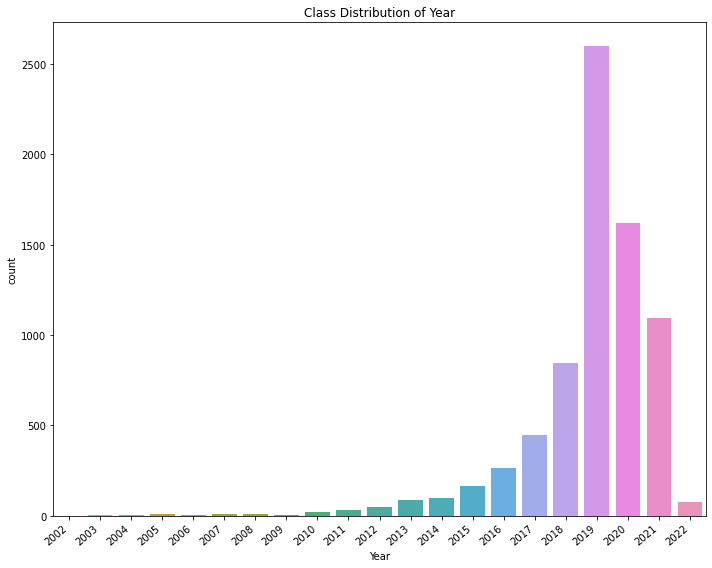

In [ ]:
plt.figure(figsize = (10,8))
ax = sns.countplot(data=df, x='Year')
ax.set(title="Class Distribution of Year")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

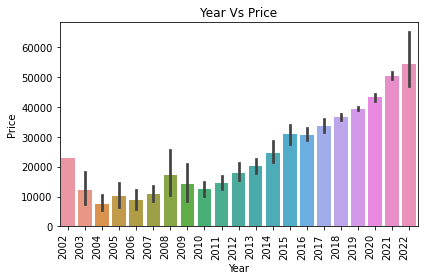

In [ ]:
ax = sns.barplot(x=df['Year'], y=df['Price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set(title="Year Vs Price")
plt.tight_layout()
plt.show()

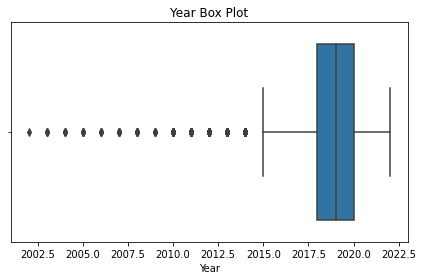

In [ ]:
sns.boxplot(x=df['Year']).set(title="Year Box Plot")
plt.tight_layout()
plt.show()

##Make

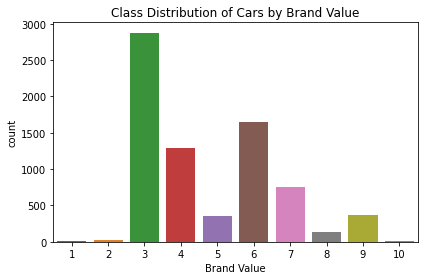

In [ ]:
ax = sns.countplot(data=df, x='Make')
ax.set(title="Class Distribution of Cars by Brand Value", xlabel="Brand Value")
plt.tight_layout()
plt.show()

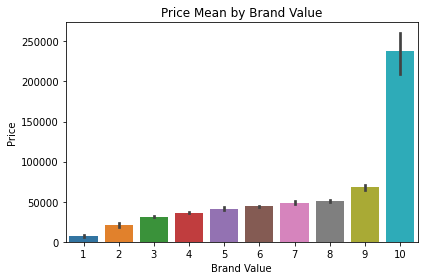

In [ ]:
ax = sns.barplot(x=df['Make'], y=df['Price'])
ax.set(title="Price Mean by Brand Value", xlabel="Brand Value")
plt.tight_layout()
plt.show()

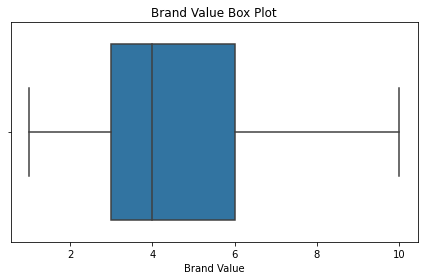

In [ ]:
ax = sns.boxplot(x=df['Make'])
ax.set(title="Brand Value Box Plot",xlabel='Brand Value')
plt.tight_layout()
plt.show()

##Price

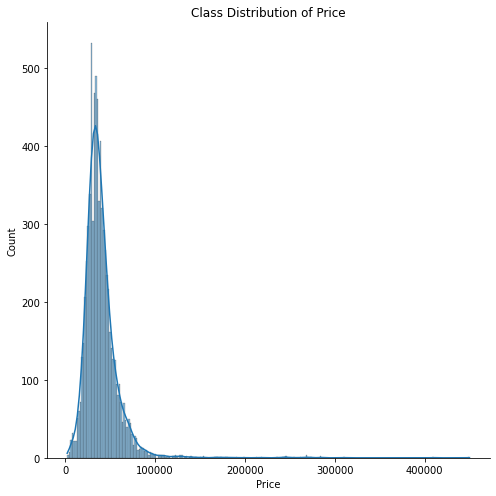

In [ ]:
sns.displot(data=df, x="Price", kde=True, height=7).set(title="Class Distribution of Price")
plt.tight_layout()
plt.show()

##Consumer Rating

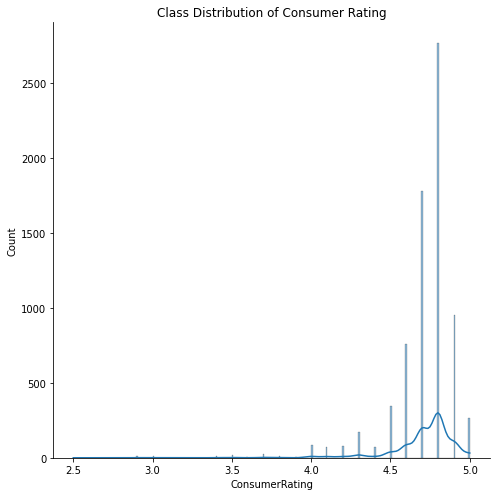

In [ ]:
sns.displot(data=df, x="ConsumerRating", kde=True, height=7).set(title="Class Distribution of Consumer Rating")
plt.tight_layout()
plt.show()

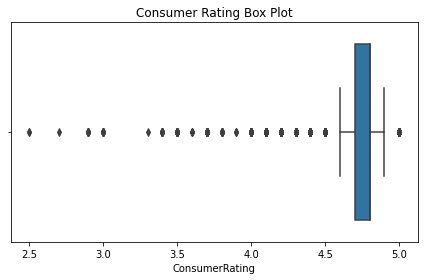

In [ ]:
sns.boxplot(x=df["ConsumerRating"]).set(title='Consumer Rating Box Plot')
plt.tight_layout()
plt.show()

##Consumer Reviews

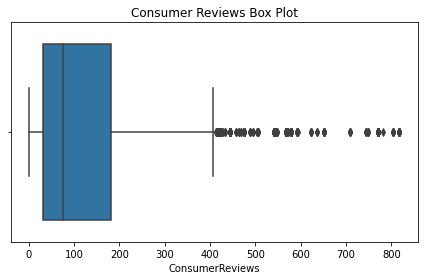

In [ ]:
sns.boxplot(x=df["ConsumerReviews"]).set(title="Consumer Reviews Box Plot")
plt.tight_layout()
plt.show()

##Comfort Rating

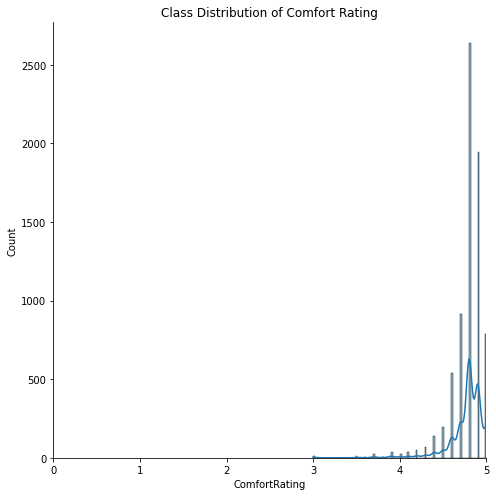

In [ ]:
ax = sns.displot(data=df, x="ComfortRating", kde=True, height=7).set(title="Class Distribution of Comfort Rating",xlim=(0.0,5.0))
plt.tight_layout()
plt.show()

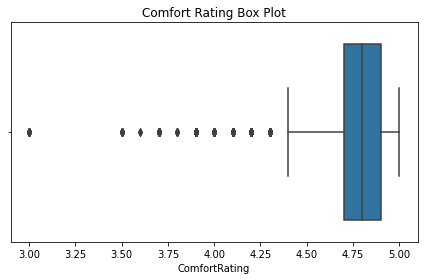

In [ ]:
sns.boxplot(x=df["ComfortRating"]).set(title="Comfort Rating Box Plot")
plt.tight_layout()
plt.show()

##Interior Design Rating

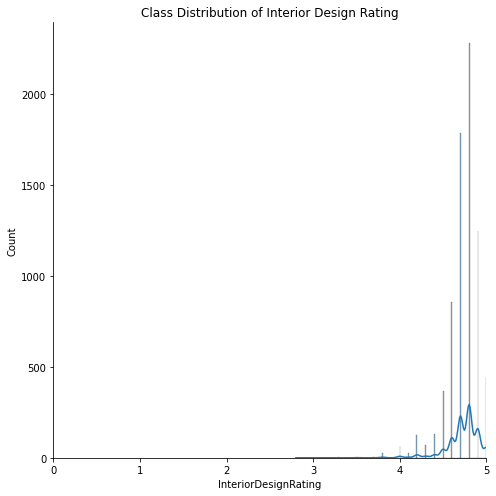

In [ ]:
ax = sns.displot(data=df, x="InteriorDesignRating", kde=True, height=7).set(title="Class Distribution of Interior Design Rating",xlim=(0.0,5.0))
plt.tight_layout()
plt.show()

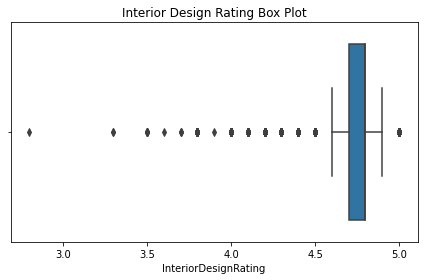

In [ ]:
sns.boxplot(x=df["InteriorDesignRating"]).set(title='Interior Design Rating Box Plot')
plt.tight_layout()
plt.show()

##Performance Rating

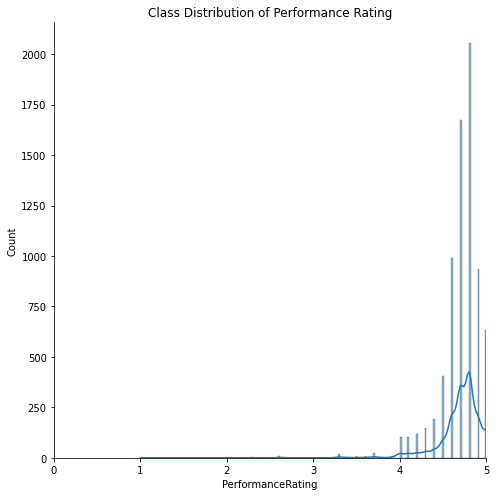

In [ ]:
ax = sns.displot(data=df, x="PerformanceRating", kde=True, height=7).set(title="Class Distribution of Performance Rating",xlim=(0.0,5.0))
plt.tight_layout()
plt.show()

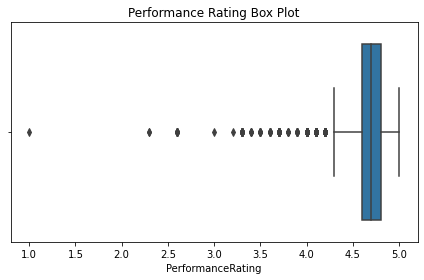

In [ ]:
sns.boxplot(x=df["PerformanceRating"]).set(title="Performance Rating Box Plot")
plt.tight_layout()
plt.show()

##Exterior Styling Rating

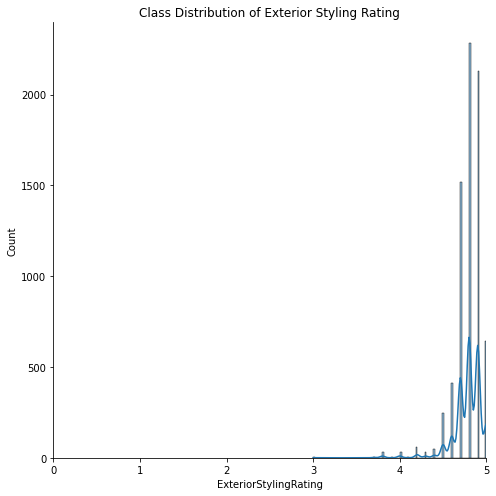

In [ ]:
ax = sns.displot(data=df, x="ExteriorStylingRating", kde=True, height=7).set(title="Class Distribution of Exterior Styling Rating",xlim=(0.0,5.0))
plt.tight_layout()
plt.show()

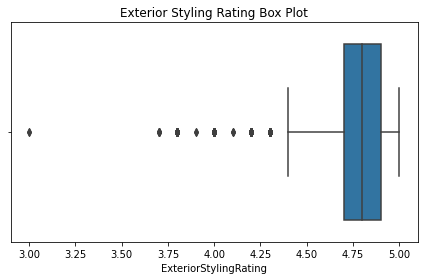

In [ ]:
sns.boxplot(x=df["ExteriorStylingRating"]).set(title="Exterior Styling Rating Box Plot")
plt.tight_layout()
plt.show()

##Reliability Rating

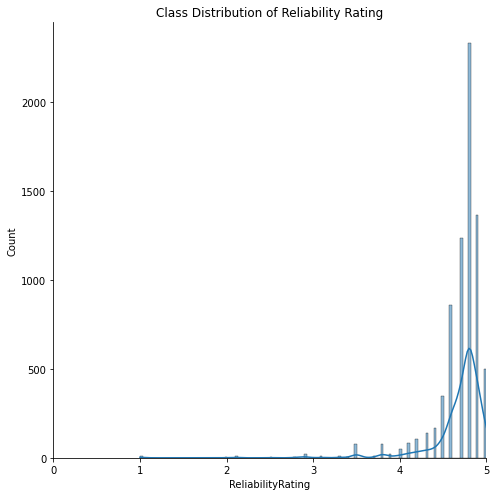

In [ ]:
ax = sns.displot(data=df, x="ReliabilityRating", kde=True, height=7).set(title="Class Distribution of Reliability Rating",xlim=(0.0,5.0))
plt.tight_layout()
plt.show()

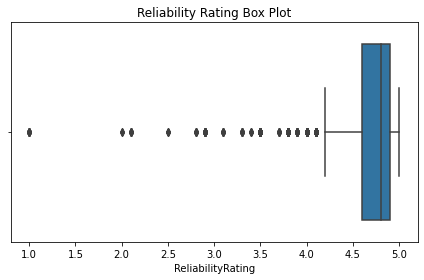

In [ ]:
sns.boxplot(x=df["ReliabilityRating"]).set(title="Reliability Rating Box Plot")
plt.tight_layout()
plt.show()

##Drivetrain

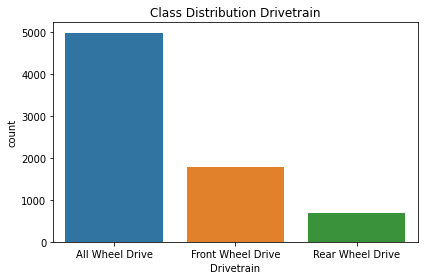

In [ ]:
ax = sns.countplot(data=df, x='Drivetrain', order = df['Drivetrain'].value_counts().index)
ax.set(title="Class Distribution Drivetrain")
ax.set(xticklabels = (['All Wheel Drive', 'Front Wheel Drive', 'Rear Wheel Drive']))
plt.tight_layout()
plt.show()

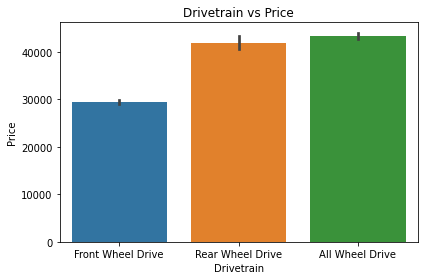

In [ ]:
ax = sns.barplot(df['Drivetrain'], df['Price'])
ax.set(title="Drivetrain vs Price", xticklabels = (['Front Wheel Drive', 'Rear Wheel Drive', 'All Wheel Drive']))
plt.tight_layout()
plt.show()

##MinMPG

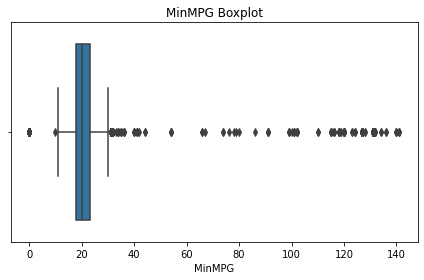

In [ ]:
sns.boxplot(x=df["MinMPG"]).set(title="MinMPG Boxplot")
plt.tight_layout()
plt.show()

##MaxMPG

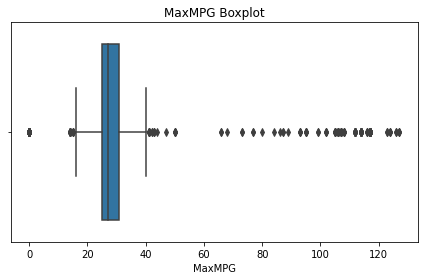

In [ ]:
sns.boxplot(x=df["MaxMPG"]).set(title="MaxMPG Boxplot")
plt.tight_layout()
plt.show()

##Fuel Type

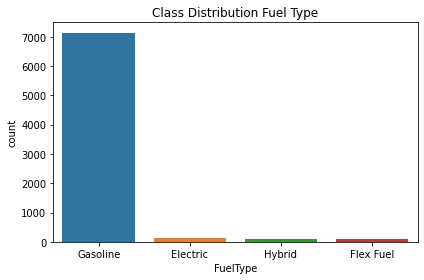

In [ ]:
ax = sns.countplot(data=df, x='FuelType', order = df['FuelType'].value_counts().index)
ax.set(title="Class Distribution Fuel Type", xticklabels = (['Gasoline', 'Electric', 'Hybrid', 'Flex Fuel']))
plt.tight_layout()
plt.show()

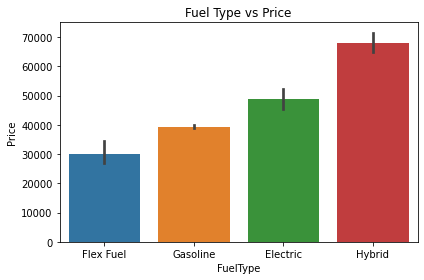

In [ ]:
sns.barplot(df['FuelType'], df['Price']).set(title="Fuel Type vs Price", xticklabels=(['Flex Fuel', 'Gasoline', 'Electric', 'Hybrid']))
plt.tight_layout()
plt.show()

##Transmission

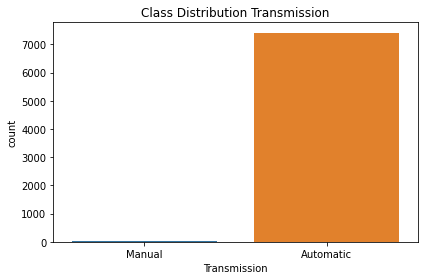

In [ ]:
sns.countplot(data=df, x='Transmission').set(title="Class Distribution Transmission", xticklabels= (['Manual', 'Automatic']))
plt.tight_layout()
plt.show()

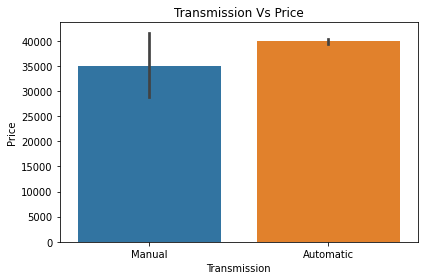

In [ ]:
sns.barplot(df['Transmission'], df['Price']).set(title="Transmission Vs Price", xticklabels=(['Manual', 'Automatic']))
plt.tight_layout()
plt.show()

##Mileage

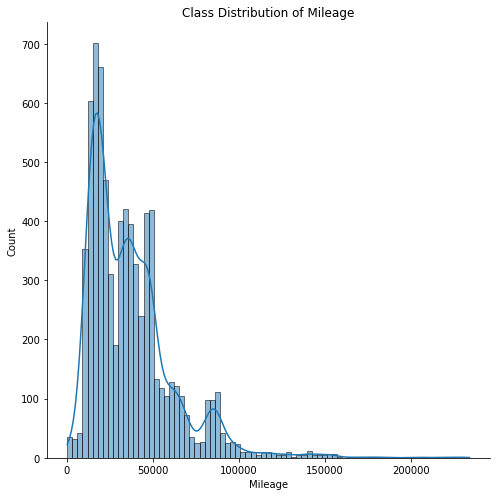

In [ ]:
sns.displot(data=df, x="Mileage", kde=True, height=7).set(title="Class Distribution of Mileage")
plt.tight_layout()
plt.show()

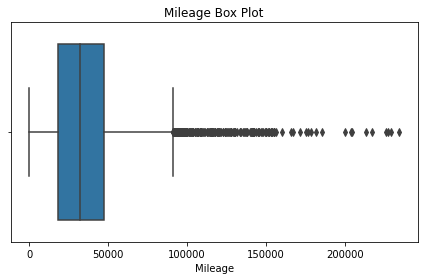

In [ ]:
sns.boxplot(x=df["Mileage"]).set(title="Mileage Box Plot")
plt.tight_layout()
plt.show()

##Dealer/Private

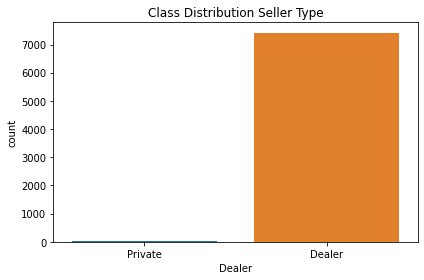

In [ ]:
ax = sns.countplot(data=df, x='Dealer').set(title="Class Distribution Seller Type", xticklabels = (['Private', 'Dealer']))
plt.tight_layout()
plt.show()

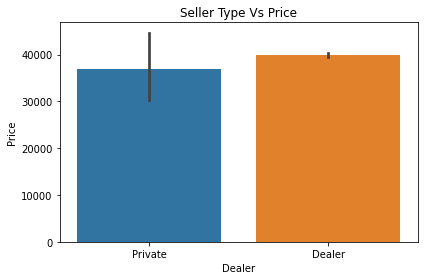

In [ ]:
sns.barplot(df['Dealer'], df['Price']).set(title="Seller Type Vs Price", xticklabels=(['Private', 'Dealer']))
plt.tight_layout()
plt.show()

##Used/Certified

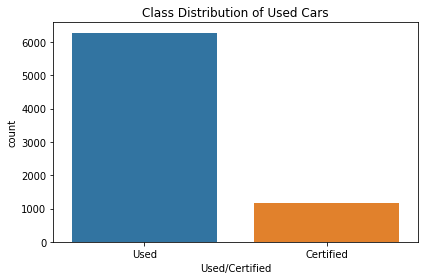

In [ ]:
sns.countplot(data=df, x='Used/Certified').set(title="Class Distribution of Used Cars", xlabel='Used/Certified', xticklabels=(['Used', 'Certified']))
plt.tight_layout()
plt.show()

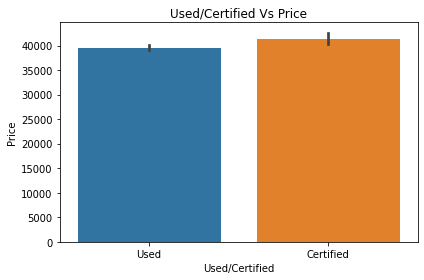

In [ ]:
sns.barplot(df['Used/Certified'], df['Price']).set(title="Used/Certified Vs Price", xticklabels=(['Used', 'Certified']))
plt.tight_layout()
plt.show()

##Engine

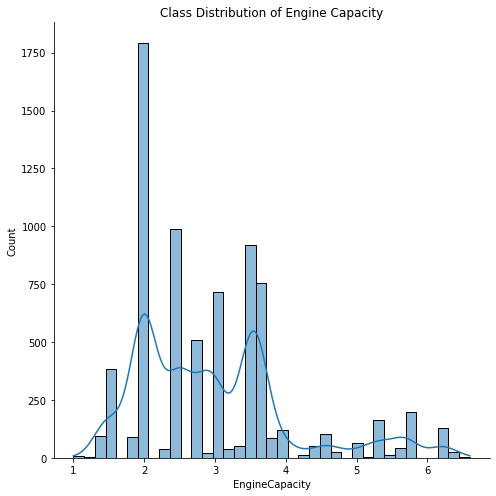

In [ ]:
sns.displot(data=df, x="EngineCapacity", kde=True, height=7).set(title="Class Distribution of Engine Capacity")
plt.tight_layout()
plt.show()

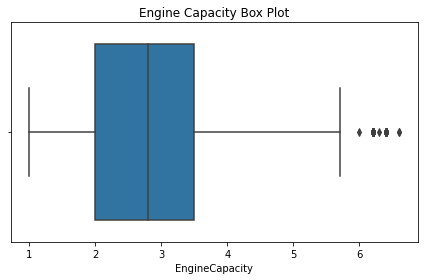

In [ ]:
sns.boxplot(df['EngineCapacity']).set(title="Engine Capacity Box Plot")
plt.tight_layout()
plt.show()

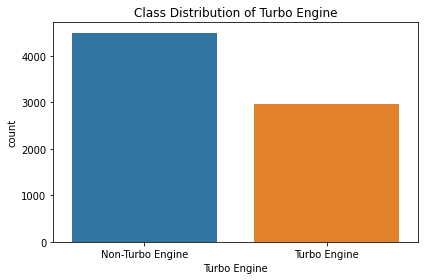

In [ ]:
sns.countplot(data=df, x='isTurboEngine').set(title="Class Distribution of Turbo Engine", xlabel='Turbo Engine', xticklabels=(['Non-Turbo Engine', 'Turbo Engine']))
plt.tight_layout()
plt.show()

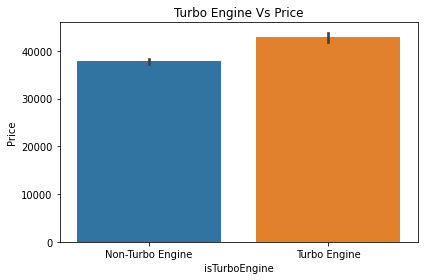

In [ ]:
sns.barplot(df['isTurboEngine'], df['Price']).set(title="Turbo Engine Vs Price", xticklabels=(['Non-Turbo Engine', 'Turbo Engine']))
plt.tight_layout()
plt.show()

##Heatmap

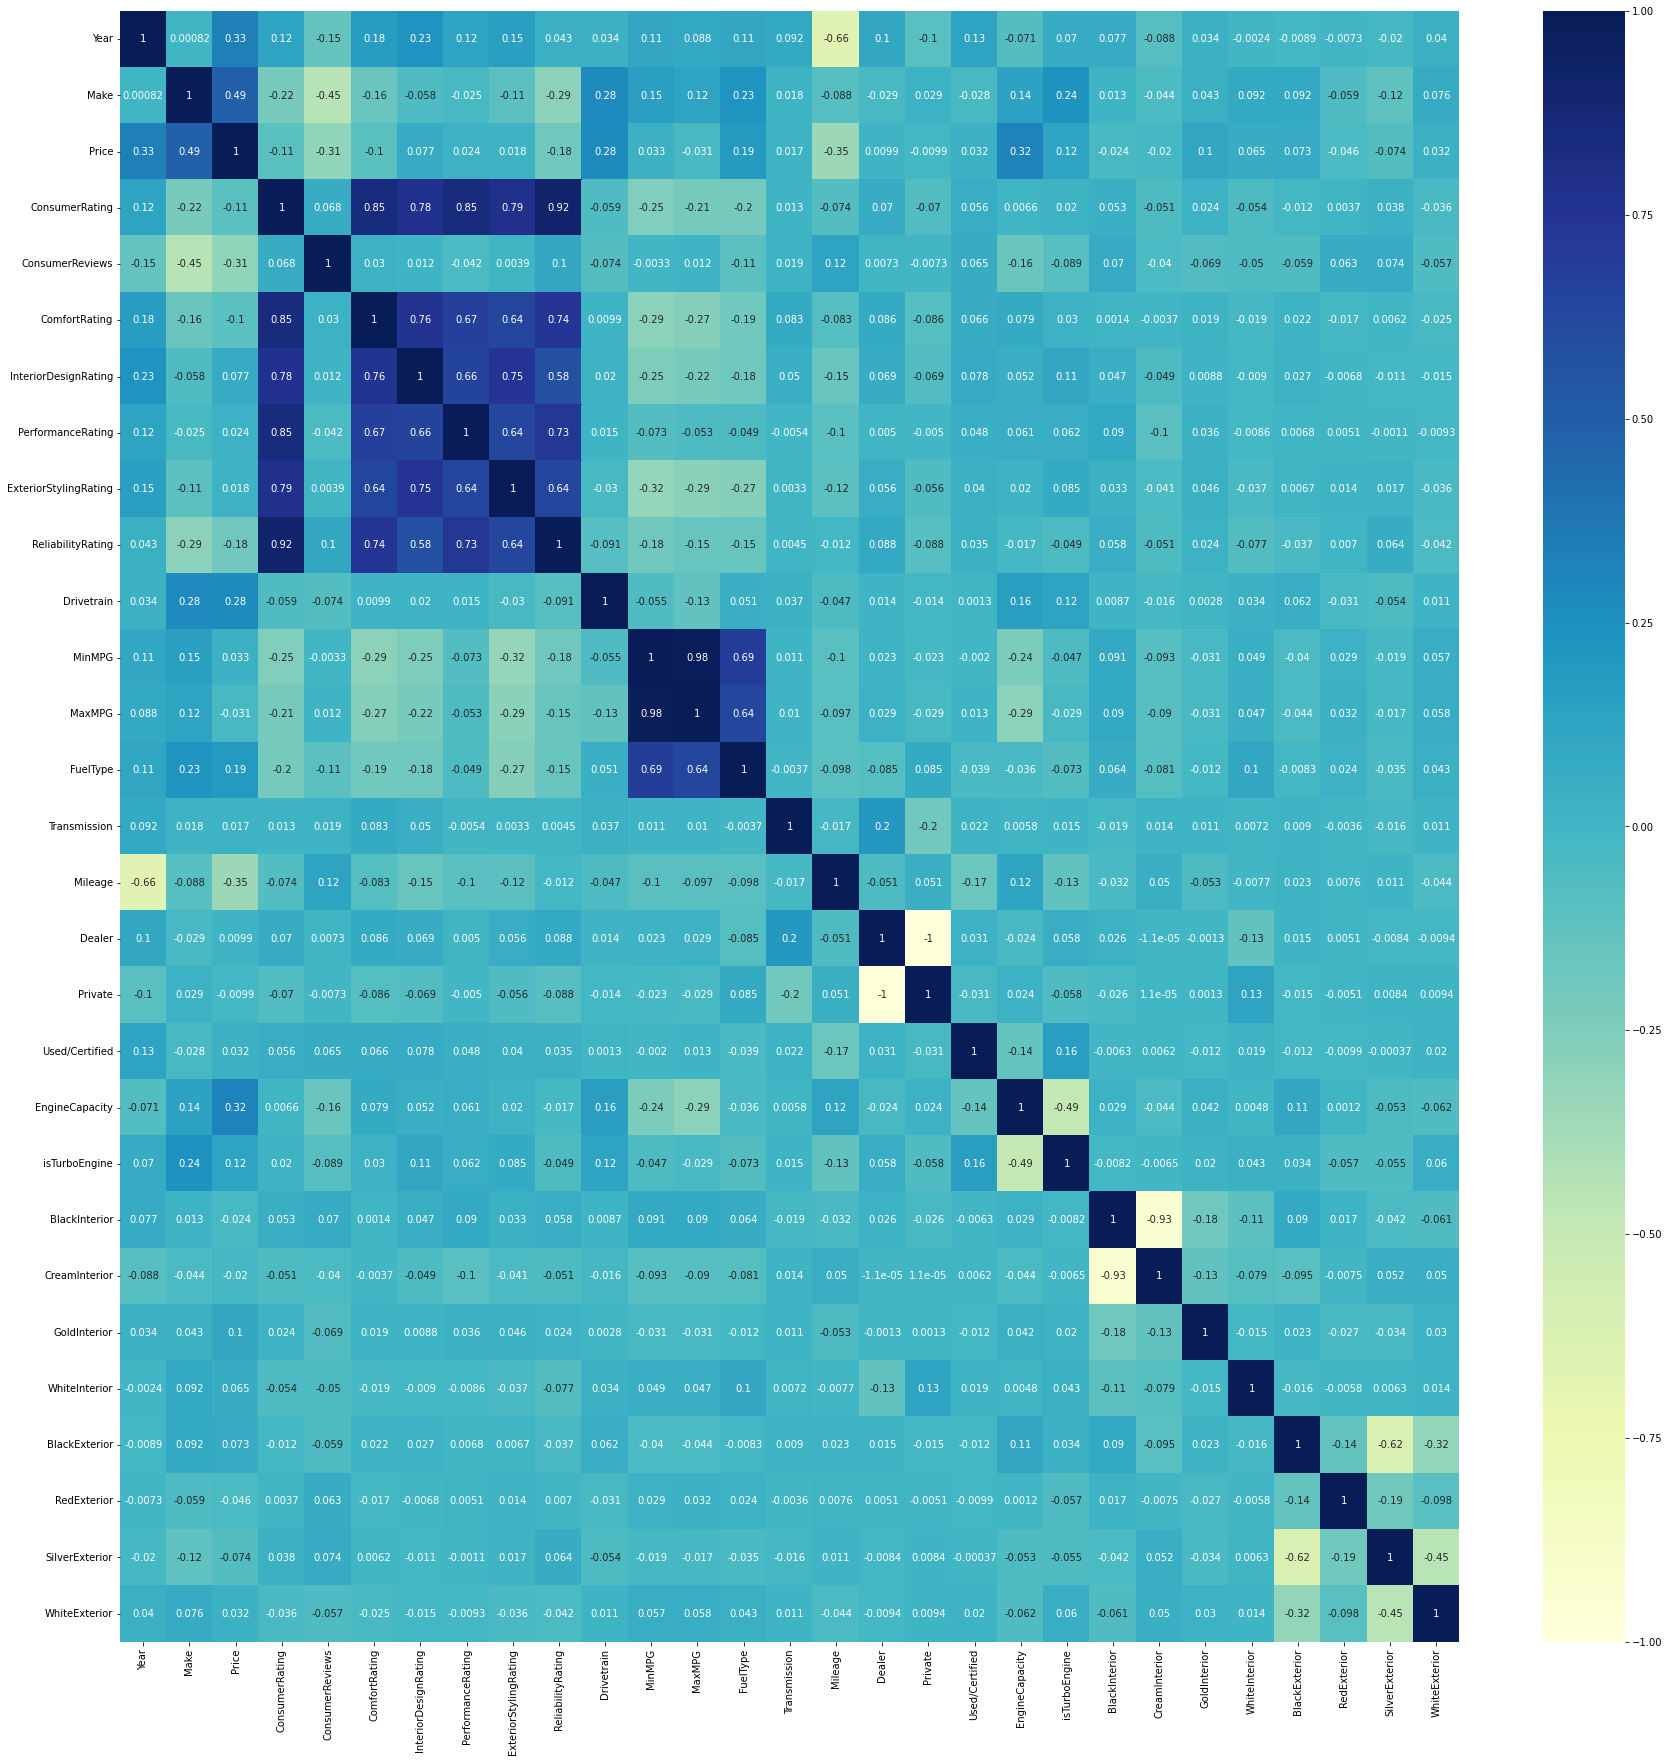

In [ ]:
plt.figure(figsize = (30,30))
heatplot = sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
heatplot

#TSNE

[Text(0.5, 1.0, 'TSNE Projection')]

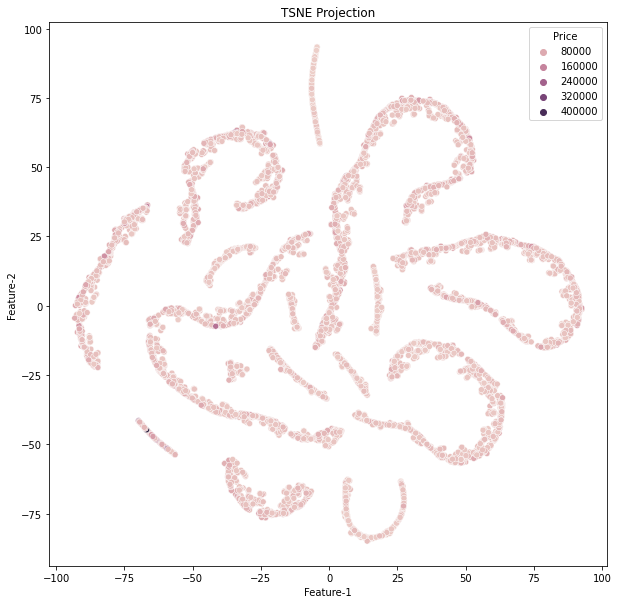

In [ ]:
tsne = TSNE(n_components = 2).fit_transform(features)

min_df = pd.DataFrame()
min_df["Feature-1"] = tsne[:,0]
min_df["Feature-2"] = tsne[:,1]
min_df["Price"] = df["Price"]

plt.figure(figsize=(10,10))
sns.scatterplot(data=min_df, hue="Price", x="Feature-1", y="Feature-2").set(title="TSNE Projection")

#PCA

In [ ]:
def plot_roc(model, feat_test, lab_test):
    y_score = model.predict_proba(feat_test)
    
    false_pos = {}
    true_pos = {}
    threshold = {}
    roc_auc = dict()
    
    y_test_binarize = label_binarize(lab_test, classes=np.unique(lab_test))
    
    y_rows, y_cols = y_score.shape
    
    for i in range(y_cols):
        false_pos[i], true_pos[i], threshold[i] = roc_curve(y_test_binarize[:,i], y_score[:,i])
        roc_auc[i] = auc(false_pos[i], true_pos[i])
        plt.plot(false_pos[i], true_pos[i], label='Class %s vs Rest (AUC=%0.3f)' %(i, roc_auc[i]))
        
    plt.title('ROC Curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
pca = PCA(.90)
pca_df = pca.fit(features).transform(features)

#Performance_Metrics


In [ ]:
features[['Mileage','ConsumerRating','ReliabilityRating','ComfortRating','InteriorDesignRating','ExteriorStylingRating','MinMPG','MaxMPG','PerformanceRating','ConsumerReviews', 'EngineCapacity']] = StandardScaler().fit_transform(features[['Mileage','ConsumerRating','ReliabilityRating','ComfortRating','InteriorDesignRating','ExteriorStylingRating','MinMPG','MaxMPG','PerformanceRating','ConsumerReviews', 'EngineCapacity']])

In [ ]:
features.head()

,Year,Make,ConsumerRating,ConsumerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ExteriorStylingRating,ReliabilityRating,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Mileage,Dealer,Private,Used/Certified,EngineCapacity,isTurboEngine,BlackInterior,CreamInterior,GoldInterior,WhiteInterior,BlackExterior,RedExterior,SilverExterior,WhiteExterior
0,2019,3,-0.459282,-0.572470,-0.365878,-0.676653,-0.382745,-1.106811,0.041145,1,-0.249131,-0.156347,2,2,-0.300085,1.0,0.0,1,0.474501,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2018,3,0.405877,4.464991,0.603208,0.372758,0.410970,0.090193,0.041145,3,-0.249131,-0.412694,2,2,-0.158944,1.0,0.0,1,0.474501,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2017,8,-0.026702,2.363874,0.118665,-0.151948,0.410970,0.090193,0.041145,3,-0.546854,-0.669042,2,2,-0.549462,1.0,0.0,1,2.463190,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020,6,0.405877,-0.370188,0.603208,0.372758,0.410970,0.090193,0.625176,1,-0.174700,-0.156347,2,2,-0.350761,1.0,0.0,1,0.474501,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2017,3,-0.459282,0.438938,-0.850422,-1.726065,-1.176459,-0.508309,0.333161,1,0.420745,0.441797,2,2,-1.058425,1.0,0.0,1,-1.062213,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
# Splitting Data into 60:20:20 ratio for Training:Validation:Testing
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, shuffle = True)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def get_metrics(y_pred,y_test, Data_Set):
  print(f"Performance Metrics on {Data_Set} Data-Set: \n")
  m_absolute_error = mean_absolute_error(y_test, y_pred)
  mean_square_error = mean_squared_error(y_test, y_pred, squared = True)
  root_mean_square_error = mean_squared_error(y_test, y_pred, squared = False)
  # It explains the degree to which the input variables explain the variation of the output / predicted variable.
  r2_Score = r2_score(y_test, y_pred) 
  
  print("Absolute Error: ",m_absolute_error)
  print("Mean Square Error: ",mean_square_error)
  print("Root Mean Square Error: ",root_mean_square_error)
  print("R2 Score: ",r2_Score)
  print("----------------------------------------------------")


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

scoring_para = ['neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','r2']

def perform_linear_regression(x_train, y_train, x_test, y_test):
  print("Performing Linear Regression:\n")
  reg = LinearRegression()
  reg.fit(x_train, y_train)
  y_pred = reg.predict(x_test)
  get_metrics(reg.predict(x_train), y_train, "Training")
  get_metrics(y_pred, y_test, "Testing")

def perform_linear_regression_lasso(x_train, y_train, x_test, y_test):
  print("Performing Linear Regression with Lasso Regularization:\n")
  params = {
      'alpha':np.linspace(0, 50, 500)
  }
  gscv = GridSearchCV(Lasso(), param_grid = params, scoring = scoring_para, refit = 'neg_root_mean_squared_error', return_train_score = True, n_jobs = -1, cv = 4)
  gscv.fit(x_train, y_train)
  result = pd.DataFrame(gscv.cv_results_)
  print("----------------------------------------------------")
  print("Best Parameter: ", gscv.best_params_)
  print("----------------------------------------------------")
  y_pred = gscv.predict(x_test)
  get_metrics(gscv.predict(x_train), y_train, "Training")
  get_metrics(y_pred, y_test, "Testing")
  return result

def perform_linear_regression_ridge(x_train, y_train, x_test, y_test):
  print("Performing Linear Regression with Ridge Regularization:\n")
  params = {
      'alpha':np.linspace(0, 50, 500)
  }
  gscv = GridSearchCV(Ridge(), param_grid = params, scoring = scoring_para, return_train_score = True, refit = 'neg_root_mean_squared_error', n_jobs = -1, cv = 4)
  gscv.fit(x_train, y_train)
  result = pd.DataFrame(gscv.cv_results_)
  # result = result[['param_alpha', 'mean_train_score', 'mean_test_score']]
  print("----------------------------------------------------")
  print("Best Parameter: ", gscv.best_params_)
  print("----------------------------------------------------")
  y_pred = gscv.predict(x_test)
  get_metrics(gscv.predict(x_train), y_train, "Training")
  get_metrics(y_pred, y_test, "Testing")
  return result

perform_linear_regression(x_train, y_train, x_test, y_test)
lresult = perform_linear_regression_lasso(x_train, y_train, x_test, y_test)
columns = ['mean_fit_time','std_fit_time','mean_score_time','std_score_time','params','split0_test_neg_mean_absolute_error','split1_test_neg_mean_absolute_error','split2_test_neg_mean_absolute_error','split3_test_neg_mean_absolute_error','std_test_neg_mean_absolute_error','rank_test_neg_mean_absolute_error','split0_train_neg_mean_absolute_error','split1_train_neg_mean_absolute_error','split2_train_neg_mean_absolute_error','split3_train_neg_mean_absolute_error','std_train_neg_mean_absolute_error',
           'split0_test_neg_mean_squared_error','split1_test_neg_mean_squared_error','split2_test_neg_mean_squared_error','split3_test_neg_mean_squared_error','std_test_neg_mean_squared_error','rank_test_neg_mean_squared_error','split0_train_neg_mean_squared_error','split1_train_neg_mean_squared_error','split2_train_neg_mean_squared_error','split3_train_neg_mean_squared_error','std_train_neg_mean_squared_error','split0_test_neg_root_mean_squared_error','split1_test_neg_root_mean_squared_error',
           'split2_test_neg_root_mean_squared_error','split3_test_neg_root_mean_squared_error','std_test_neg_root_mean_squared_error','rank_test_neg_root_mean_squared_error','split0_train_neg_root_mean_squared_error','split1_train_neg_root_mean_squared_error','split2_train_neg_root_mean_squared_error','split3_train_neg_root_mean_squared_error','std_train_neg_root_mean_squared_error','split0_test_r2','split1_test_r2','split2_test_r2','split3_test_r2','std_test_r2','rank_test_r2','split0_train_r2',
           'split1_train_r2','split2_train_r2','split3_train_r2','std_train_r2']
lresult = lresult.drop(columns,axis=1)
for i in lresult.columns.tolist()[1:-2]:
  lresult[i] = lresult[i].apply(lambda x: x*-1)

rresult = perform_linear_regression_ridge(x_train, y_train, x_test, y_test)
rresult = rresult.drop(columns,axis=1)
for i in lresult.columns.tolist()[1:-2]:
  rresult[i] = rresult[i].apply(lambda x: x*-1)


Performing Linear Regression:

Performance Metrics on Training Data-Set: 

Absolute Error:  7372.409692513757
Mean Square Error:  190729586.07469398
Root Mean Square Error:  13810.488263442896
R2 Score:  0.5483386448919841
----------------------------------------------------
Performance Metrics on Testing Data-Set: 

Absolute Error:  7290.192246735668
Mean Square Error:  207909323.58681455
Root Mean Square Error:  14419.061120156699
R2 Score:  0.5047594243059601
----------------------------------------------------
Performing Linear Regression with Lasso Regularization:

----------------------------------------------------
Best Parameter:  {'alpha': 19.138276553106213}
----------------------------------------------------
Performance Metrics on Training Data-Set: 

Absolute Error:  7331.203214497218
Mean Square Error:  190923099.12995178
Root Mean Square Error:  13817.492505152726
R2 Score:  0.5478803920819844
----------------------------------------------------
Performance Metrics on Te

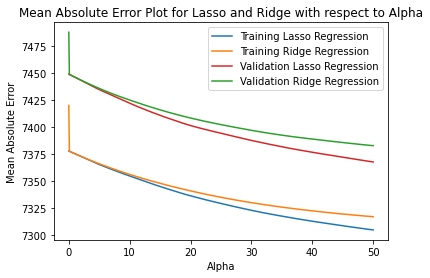

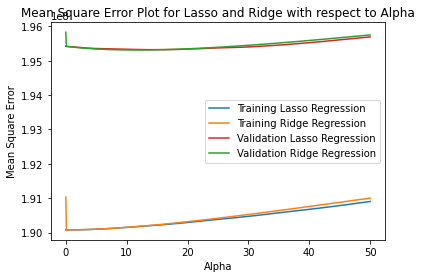

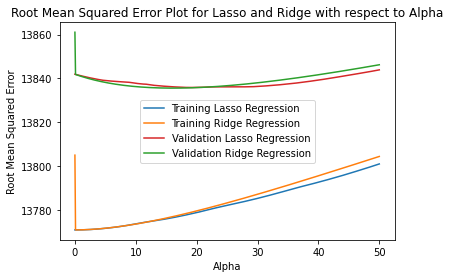

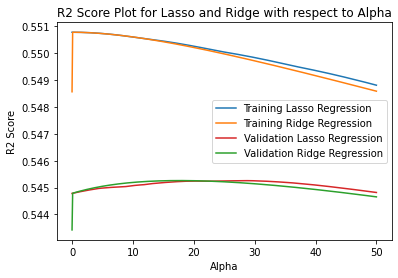

In [ ]:
# Mean Absolute Error
plt.plot(lresult['param_alpha'],lresult['mean_train_neg_mean_absolute_error'], color ='tab:blue',label='Training Lasso Regression')
plt.plot(rresult['param_alpha'],rresult['mean_train_neg_mean_absolute_error'], color ='tab:orange',label='Training Ridge Regression')
plt.plot(lresult['param_alpha'],lresult['mean_test_neg_mean_absolute_error'], color ='tab:red',label='Validation Lasso Regression')
plt.plot(rresult['param_alpha'],rresult['mean_test_neg_mean_absolute_error'], color ='tab:green',label='Validation Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error Plot for Lasso and Ridge with respect to Alpha')
plt.legend()
plt.show()

# Mean Square Error 
plt.plot(lresult['param_alpha'],lresult['mean_train_neg_mean_squared_error'], color ='tab:blue',label='Training Lasso Regression')
plt.plot(rresult['param_alpha'],rresult['mean_train_neg_mean_squared_error'], color ='tab:orange',label='Training Ridge Regression')
plt.plot(lresult['param_alpha'],lresult['mean_test_neg_mean_squared_error'], color ='tab:red',label='Validation Lasso Regression')
plt.plot(rresult['param_alpha'],rresult['mean_test_neg_mean_squared_error'], color ='tab:green',label='Validation Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error Plot for Lasso and Ridge with respect to Alpha')
plt.legend()
plt.show()

# Root Mean Squared Error
plt.plot(lresult['param_alpha'],lresult['mean_train_neg_root_mean_squared_error'], color ='tab:blue',label='Training Lasso Regression')
plt.plot(rresult['param_alpha'],rresult['mean_train_neg_root_mean_squared_error'], color ='tab:orange',label='Training Ridge Regression')
plt.plot(lresult['param_alpha'],lresult['mean_test_neg_root_mean_squared_error'], color ='tab:red',label='Validation Lasso Regression')
plt.plot(rresult['param_alpha'],rresult['mean_test_neg_root_mean_squared_error'], color ='tab:green',label='Validation Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error Plot for Lasso and Ridge with respect to Alpha')
plt.legend()
plt.show()

# R2 Score
plt.plot(lresult['param_alpha'],lresult['mean_train_r2'], color ='tab:blue',label='Training Lasso Regression')
plt.plot(rresult['param_alpha'],rresult['mean_train_r2'], color ='tab:orange',label='Training Ridge Regression')
plt.plot(lresult['param_alpha'],lresult['mean_test_r2'], color ='tab:red',label='Validation Lasso Regression')
plt.plot(rresult['param_alpha'],rresult['mean_test_r2'], color ='tab:green',label='Validation Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Score Plot for Lasso and Ridge with respect to Alpha')
plt.legend()
plt.show()

# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

criterion_ = ""
max_depth_ = 0
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']

def perform_decision_tree_regressor(x_train, y_train, x_test, y_test):
  params = {
      'criterion': ["absolute_error", "squared_error"],
      'max_depth': [i for i in range(1,30,1)]
  }
  gscv = GridSearchCV(DecisionTreeRegressor(), scoring = scoring, refit = 'neg_root_mean_squared_error', param_grid = params, return_train_score = True, n_jobs = -1, cv = 4)
  gscv.fit(x_train, y_train)
  result = pd.DataFrame(gscv.cv_results_)
  # print("Cross Validation Results for Training and Validation Set:")
  # print(result.to_string())
  print("----------------------------------------------------")
  print("Best Parameter: ", gscv.best_params_)
  print("----------------------------------------------------")
  y_pred = gscv.predict(x_test)
  get_metrics(gscv.predict(x_train), y_train, "Training")
  get_metrics(y_pred, y_test,"Testing")
  
  return result,gscv.best_params_

def perform_adaboost_dtr(x_train, y_train, x_test, y_test):
  params = {
      "n_estimators" : [i for i in range(50,350, 50)],
      "loss" : ["linear", "square", "exponential"]
  }
  gscv = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(criterion = criterion_, max_depth = max_depth_)), scoring = scoring, refit = 'neg_root_mean_squared_error', param_grid = params, return_train_score = True, n_jobs = -1, cv = 4)
  gscv.fit(x_train, y_train)
  result = pd.DataFrame(gscv.cv_results_)
  print("Cross Validation Results for Training and Validation Set:")
  print(result.to_string())
  print("----------------------------------------------------")
  print("Best Parameter: ", gscv.best_params_)
  print("----------------------------------------------------")
  y_pred = gscv.predict(x_test)
  get_metrics(gscv.predict(x_train), y_train, "Training")
  get_metrics(y_pred, y_test, "Testing")
  return result

dtresult, bestdt = perform_decision_tree_regressor(x_train, y_train, x_test, y_test)
criterion_ = bestdt['criterion']
max_depth_ = bestdt['max_depth']

----------------------------------------------------
Best Parameter:  {'criterion': 'squared_error', 'max_depth': 20}
----------------------------------------------------
Performance Metrics on Training Data-Set: 

Absolute Error:  243.26000813769002
Mean Square Error:  594911.5302106829
Root Mean Square Error:  771.3050824483674
R2 Score:  0.9985459514653857
----------------------------------------------------
Performance Metrics on Testing Data-Set: 

Absolute Error:  4579.400567424458
Mean Square Error:  99942596.38374096
Root Mean Square Error:  9997.12940717189
R2 Score:  0.7882497961843715
----------------------------------------------------


In [ ]:
adadt = perform_adaboost_dtr(x_train, y_train, x_test, y_test)

Cross Validation Results for Training and Validation Set:
    mean_fit_time  std_fit_time  mean_score_time  std_score_time   param_loss param_n_estimators                                        params  split0_test_neg_mean_absolute_error  split1_test_neg_mean_absolute_error  split2_test_neg_mean_absolute_error  split3_test_neg_mean_absolute_error  mean_test_neg_mean_absolute_error  std_test_neg_mean_absolute_error  rank_test_neg_mean_absolute_error  split0_train_neg_mean_absolute_error  split1_train_neg_mean_absolute_error  split2_train_neg_mean_absolute_error  split3_train_neg_mean_absolute_error  mean_train_neg_mean_absolute_error  std_train_neg_mean_absolute_error  split0_test_neg_mean_squared_error  split1_test_neg_mean_squared_error  split2_test_neg_mean_squared_error  split3_test_neg_mean_squared_error  mean_test_neg_mean_squared_error  std_test_neg_mean_squared_error  rank_test_neg_mean_squared_error  split0_train_neg_mean_squared_error  split1_train_neg_mean_squared_error  spli

In [ ]:
columns = ['mean_fit_time','std_fit_time','mean_score_time','std_score_time','params','split0_test_neg_mean_absolute_error','split1_test_neg_mean_absolute_error','split2_test_neg_mean_absolute_error','split3_test_neg_mean_absolute_error','std_test_neg_mean_absolute_error','rank_test_neg_mean_absolute_error','split0_train_neg_mean_absolute_error','split1_train_neg_mean_absolute_error','split2_train_neg_mean_absolute_error','split3_train_neg_mean_absolute_error','std_train_neg_mean_absolute_error',
           'split0_test_neg_mean_squared_error','split1_test_neg_mean_squared_error','split2_test_neg_mean_squared_error','split3_test_neg_mean_squared_error','std_test_neg_mean_squared_error','rank_test_neg_mean_squared_error','split0_train_neg_mean_squared_error','split1_train_neg_mean_squared_error','split2_train_neg_mean_squared_error','split3_train_neg_mean_squared_error','std_train_neg_mean_squared_error','split0_test_neg_root_mean_squared_error','split1_test_neg_root_mean_squared_error',
           'split2_test_neg_root_mean_squared_error','split3_test_neg_root_mean_squared_error','std_test_neg_root_mean_squared_error','rank_test_neg_root_mean_squared_error','split0_train_neg_root_mean_squared_error','split1_train_neg_root_mean_squared_error','split2_train_neg_root_mean_squared_error','split3_train_neg_root_mean_squared_error','std_train_neg_root_mean_squared_error','split0_test_r2','split1_test_r2','split2_test_r2','split3_test_r2','std_test_r2','rank_test_r2','split0_train_r2',
           'split1_train_r2','split2_train_r2','split3_train_r2','std_train_r2']

## Decision Tree Performance Metrics

In [ ]:
dtresult = dtresult.drop(columns,axis=1)

In [ ]:
for i in dtresult.columns.tolist()[2:-2]:
  dtresult[i] = dtresult[i].apply(lambda x: x*-1)

In [ ]:
dtresult

,param_criterion,param_max_depth,mean_test_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_train_neg_mean_squared_error,mean_test_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,mean_test_r2,mean_train_r2
0,absolute_error,1,10870.692315,10740.909140,3.671362e+08,3.624146e+08,19039.495674,19029.210012,0.135602,0.141233
1,absolute_error,2,9663.722634,9516.381044,3.129139e+08,3.074159e+08,17555.951845,17524.935122,0.266234,0.271622
2,absolute_error,3,8449.919431,8369.377602,2.600879e+08,2.537227e+08,15902.311550,15915.245928,0.399053,0.397336
3,absolute_error,4,7311.900339,7119.842330,1.882999e+08,1.813182e+08,13550.297030,13455.235864,0.563691,0.570733
4,absolute_error,5,6729.176208,6315.510816,1.715155e+08,1.550754e+08,12900.036965,12439.179727,0.604730,0.633226
5,absolute_error,6,6192.774353,5586.263128,1.563153e+08,1.287441e+08,12343.678511,11310.632904,0.638395,0.696531
6,absolute_error,7,5825.610024,4914.553270,1.514050e+08,8.227938e+07,12124.141213,9065.005217,0.651153,0.805026
7,absolute_error,8,5490.108318,4259.461857,1.414130e+08,6.457344e+07,11657.938591,8024.339117,0.677618,0.846762
8,absolute_error,9,5290.647601,3657.183981,1.360367e+08,5.185328e+07,11468.089264,7181.699853,0.687855,0.877338
9,absolute_error,10,5102.929282,3097.260452,1.185857e+08,3.861245e+07,10687.028291,6189.503415,0.727078,0.908845


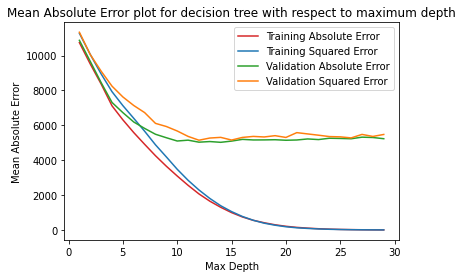

In [ ]:
pmd_ae_t = []
pmd_se_t = []
err_ae_t = []
err_se_t = []

pmd_ae_v = []
pmd_se_v = []
err_ae_v = []
err_se_v = []

for i in range(len(dtresult['param_max_depth'])):
    if (dtresult['param_criterion'][i] == 'absolute_error'):
        pmd_ae_t.append(dtresult['param_max_depth'][i])
        err_ae_t.append(dtresult['mean_train_neg_mean_absolute_error'][i])
        pmd_ae_v.append(dtresult['param_max_depth'][i])
        err_ae_v.append(dtresult['mean_test_neg_mean_absolute_error'][i])
    else:
        pmd_se_t.append(dtresult['param_max_depth'][i])
        err_se_t.append(dtresult['mean_train_neg_mean_absolute_error'][i])
        pmd_se_v.append(dtresult['param_max_depth'][i])
        err_se_v.append(dtresult['mean_test_neg_mean_absolute_error'][i])

plt.plot(pmd_ae_t, err_ae_t,color = 'tab:red',label='Training Absolute Error')
plt.plot(pmd_se_t, err_se_t,color = 'tab:blue',label='Training Squared Error')
plt.plot(pmd_ae_v, err_ae_v,color = 'tab:green',label='Validation Absolute Error')
plt.plot(pmd_se_v, err_se_v,color = 'tab:orange',label='Validation Squared Error')

plt.xlabel('Max Depth')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error plot for decision tree with respect to maximum depth')
plt.legend()
plt.show()


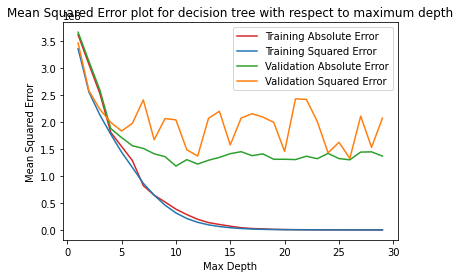

In [ ]:
pmd_ae_t = []
pmd_se_t = []
err_ae_t = []
err_se_t = []

pmd_ae_v = []
pmd_se_v = []
err_ae_v = []
err_se_v = []

for i in range(len(dtresult['param_max_depth'])):
    if (dtresult['param_criterion'][i] == 'absolute_error'):
        pmd_ae_t.append(dtresult['param_max_depth'][i])
        err_ae_t.append(dtresult['mean_train_neg_mean_squared_error'][i])
        pmd_ae_v.append(dtresult['param_max_depth'][i])
        err_ae_v.append(dtresult['mean_test_neg_mean_squared_error'][i])
    else:
        pmd_se_t.append(dtresult['param_max_depth'][i])
        err_se_t.append(dtresult['mean_train_neg_mean_squared_error'][i])
        pmd_se_v.append(dtresult['param_max_depth'][i])
        err_se_v.append(dtresult['mean_test_neg_mean_squared_error'][i])

plt.plot(pmd_ae_t, err_ae_t,color = 'tab:red',label='Training Absolute Error')
plt.plot(pmd_se_t, err_se_t,color = 'tab:blue',label='Training Squared Error')
plt.plot(pmd_ae_v, err_ae_v,color = 'tab:green',label='Validation Absolute Error')
plt.plot(pmd_se_v, err_se_v,color = 'tab:orange',label='Validation Squared Error')

plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error plot for decision tree with respect to maximum depth')
plt.legend()
plt.show()


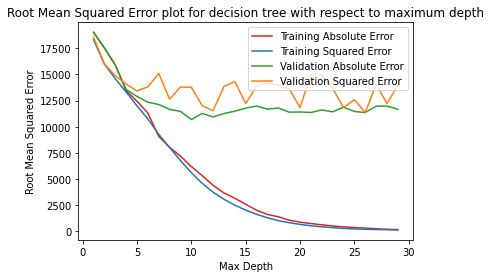

In [ ]:
pmd_ae_t = []
pmd_se_t = []
err_ae_t = []
err_se_t = []

pmd_ae_v = []
pmd_se_v = []
err_ae_v = []
err_se_v = []

for i in range(len(dtresult['param_max_depth'])):
    if (dtresult['param_criterion'][i] == 'absolute_error'):
        pmd_ae_t.append(dtresult['param_max_depth'][i])
        err_ae_t.append(dtresult['mean_train_neg_root_mean_squared_error'][i])
        pmd_ae_v.append(dtresult['param_max_depth'][i])
        err_ae_v.append(dtresult['mean_test_neg_root_mean_squared_error'][i])
    else:
        pmd_se_t.append(dtresult['param_max_depth'][i])
        err_se_t.append(dtresult['mean_train_neg_root_mean_squared_error'][i])
        pmd_se_v.append(dtresult['param_max_depth'][i])
        err_se_v.append(dtresult['mean_test_neg_root_mean_squared_error'][i])

plt.plot(pmd_ae_t, err_ae_t,color = 'tab:red',label='Training Absolute Error')
plt.plot(pmd_se_t, err_se_t,color = 'tab:blue',label='Training Squared Error')
plt.plot(pmd_ae_v, err_ae_v,color = 'tab:green',label='Validation Absolute Error')
plt.plot(pmd_se_v, err_se_v,color = 'tab:orange',label='Validation Squared Error')

plt.xlabel('Max Depth')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error plot for decision tree with respect to maximum depth')
plt.legend()
plt.show()


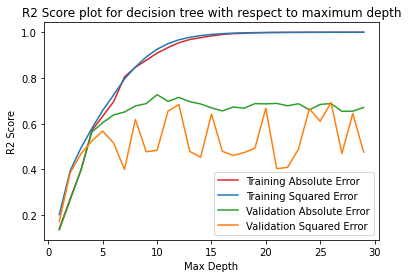

In [ ]:
pmd_ae_t = []
pmd_se_t = []
err_ae_t = []
err_se_t = []

pmd_ae_v = []
pmd_se_v = []
err_ae_v = []
err_se_v = []

for i in range(len(dtresult['param_max_depth'])):
    if (dtresult['param_criterion'][i] == 'absolute_error'):
        pmd_ae_t.append(dtresult['param_max_depth'][i])
        err_ae_t.append(dtresult['mean_train_r2'][i])
        pmd_ae_v.append(dtresult['param_max_depth'][i])
        err_ae_v.append(dtresult['mean_test_r2'][i])
    else:
        pmd_se_t.append(dtresult['param_max_depth'][i])
        err_se_t.append(dtresult['mean_train_r2'][i])
        pmd_se_v.append(dtresult['param_max_depth'][i])
        err_se_v.append(dtresult['mean_test_r2'][i])

plt.plot(pmd_ae_t, err_ae_t,color = 'tab:red',label='Training Absolute Error')
plt.plot(pmd_se_t, err_se_t,color = 'tab:blue',label='Training Squared Error')
plt.plot(pmd_ae_v, err_ae_v,color = 'tab:green',label='Validation Absolute Error')
plt.plot(pmd_se_v, err_se_v,color = 'tab:orange',label='Validation Squared Error')

plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('R2 Score plot for decision tree with respect to maximum depth')
plt.legend()
plt.show()

## ADA Boost Decision Tree Performance Metrics

In [ ]:
adadt = adadt.drop(columns,axis=1)

In [ ]:
for i in adadt.columns.tolist()[2:-2]:
  adadt[i] = adadt[i].apply(lambda x: x*-1)

In [ ]:
adadt.head()

,param_loss,param_n_estimators,mean_test_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_train_neg_mean_squared_error,mean_test_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,mean_test_r2,mean_train_r2
0,linear,50,3725.594981,261.224685,6.252245e+07,392466.125414,7862.557644,625.537957,0.847570,0.999035
1,linear,100,3662.720900,254.613541,5.985048e+07,347270.005481,7685.064037,588.686943,0.854436,0.999151
2,linear,150,3646.116368,264.968946,5.895177e+07,348755.957783,7623.160581,589.666099,0.856344,0.999145
3,linear,200,3633.829403,253.597101,5.857928e+07,323886.302870,7610.324579,568.546061,0.856897,0.999206
4,linear,250,3647.044054,264.686944,5.613784e+07,340440.239978,7445.219649,583.055956,0.862166,0.999168


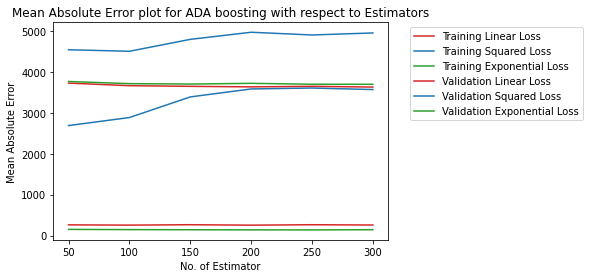

In [ ]:
est_l_t = []
est_s_t = []
est_e_t = []
err_l_t = []
err_s_t = []
err_e_t = []

est_l_v = []
est_s_v = []
est_e_v = []
err_l_v = []
err_s_v = []
err_e_v = []

for i in range(len(adadt['param_loss'])):
    if (adadt['param_loss'][i] == 'linear'):
        est_l_t.append(adadt['param_n_estimators'][i])
        err_l_t.append(adadt['mean_train_neg_mean_absolute_error'][i])
        est_l_v.append(adadt['param_n_estimators'][i])
        err_l_v.append(adadt['mean_test_neg_mean_absolute_error'][i])
    elif(adadt['param_loss'][i] == 'square'):
        est_s_t.append(adadt['param_n_estimators'][i])
        err_s_t.append(adadt['mean_train_neg_mean_absolute_error'][i])
        est_s_v.append(adadt['param_n_estimators'][i])
        err_s_v.append(adadt['mean_test_neg_mean_absolute_error'][i])
    else:
        est_e_t.append(adadt['param_n_estimators'][i])
        err_e_t.append(adadt['mean_train_neg_mean_absolute_error'][i])
        est_e_v.append(adadt['param_n_estimators'][i])
        err_e_v.append(adadt['mean_test_neg_mean_absolute_error'][i])

plt.plot(est_l_t, err_l_t,color = 'tab:red',label='Training Linear Loss')
plt.plot(est_s_t, err_s_t,color = 'tab:blue',label='Training Squared Loss')
plt.plot(est_e_t, err_e_t,color = 'tab:green',label='Training Exponential Loss')
plt.plot(est_l_v, err_l_v,color = 'tab:red',label='Validation Linear Loss')
plt.plot(est_s_v, err_s_v,color = 'tab:blue',label='Validation Squared Loss')
plt.plot(est_e_v, err_e_v,color = 'tab:green',label='Validation Exponential Loss')
plt.xlabel('No. of Estimator')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error plot for ADA boosting with respect to Estimators')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

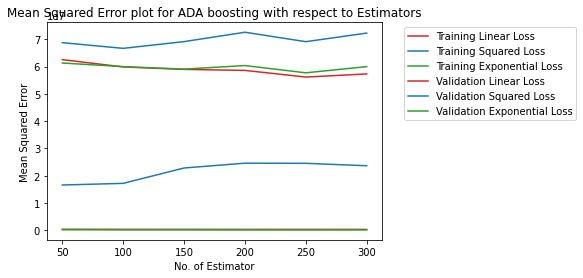

In [ ]:
est_l_t = []
est_s_t = []
est_e_t = []
err_l_t = []
err_s_t = []
err_e_t = []

est_l_v = []
est_s_v = []
est_e_v = []
err_l_v = []
err_s_v = []
err_e_v = []

for i in range(len(adadt['param_loss'])):
    if (adadt['param_loss'][i] == 'linear'):
        est_l_t.append(adadt['param_n_estimators'][i])
        err_l_t.append(adadt['mean_train_neg_mean_squared_error'][i])
        est_l_v.append(adadt['param_n_estimators'][i])
        err_l_v.append(adadt['mean_test_neg_mean_squared_error'][i])
    elif(adadt['param_loss'][i] == 'square'):
        est_s_t.append(adadt['param_n_estimators'][i])
        err_s_t.append(adadt['mean_train_neg_mean_squared_error'][i])
        est_s_v.append(adadt['param_n_estimators'][i])
        err_s_v.append(adadt['mean_test_neg_mean_squared_error'][i])
    else:
        est_e_t.append(adadt['param_n_estimators'][i])
        err_e_t.append(adadt['mean_train_neg_mean_squared_error'][i])
        est_e_v.append(adadt['param_n_estimators'][i])
        err_e_v.append(adadt['mean_test_neg_mean_squared_error'][i])

plt.plot(est_l_t, err_l_t,color = 'tab:red',label='Training Linear Loss')
plt.plot(est_s_t, err_s_t,color = 'tab:blue',label='Training Squared Loss')
plt.plot(est_e_t, err_e_t,color = 'tab:green',label='Training Exponential Loss')
plt.plot(est_l_v, err_l_v,color = 'tab:red',label='Validation Linear Loss')
plt.plot(est_s_v, err_s_v,color = 'tab:blue',label='Validation Squared Loss')
plt.plot(est_e_v, err_e_v,color = 'tab:green',label='Validation Exponential Loss')
plt.xlabel('No. of Estimator')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error plot for ADA boosting with respect to Estimators')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


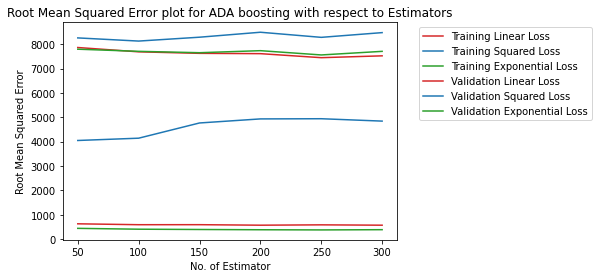

In [ ]:
est_l_t = []
est_s_t = []
est_e_t = []
err_l_t = []
err_s_t = []
err_e_t = []

est_l_v = []
est_s_v = []
est_e_v = []
err_l_v = []
err_s_v = []
err_e_v = []

for i in range(len(adadt['param_loss'])):
    if (adadt['param_loss'][i] == 'linear'):
        est_l_t.append(adadt['param_n_estimators'][i])
        err_l_t.append(adadt['mean_train_neg_root_mean_squared_error'][i])
        est_l_v.append(adadt['param_n_estimators'][i])
        err_l_v.append(adadt['mean_test_neg_root_mean_squared_error'][i])
    elif(adadt['param_loss'][i] == 'square'):
        est_s_t.append(adadt['param_n_estimators'][i])
        err_s_t.append(adadt['mean_train_neg_root_mean_squared_error'][i])
        est_s_v.append(adadt['param_n_estimators'][i])
        err_s_v.append(adadt['mean_test_neg_root_mean_squared_error'][i])
    else:
        est_e_t.append(adadt['param_n_estimators'][i])
        err_e_t.append(adadt['mean_train_neg_root_mean_squared_error'][i])
        est_e_v.append(adadt['param_n_estimators'][i])
        err_e_v.append(adadt['mean_test_neg_root_mean_squared_error'][i])

plt.plot(est_l_t, err_l_t,color = 'tab:red',label='Training Linear Loss')
plt.plot(est_s_t, err_s_t,color = 'tab:blue',label='Training Squared Loss')
plt.plot(est_e_t, err_e_t,color = 'tab:green',label='Training Exponential Loss')
plt.plot(est_l_v, err_l_v,color = 'tab:red',label='Validation Linear Loss')
plt.plot(est_s_v, err_s_v,color = 'tab:blue',label='Validation Squared Loss')
plt.plot(est_e_v, err_e_v,color = 'tab:green',label='Validation Exponential Loss')
plt.xlabel('No. of Estimator')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error plot for ADA boosting with respect to Estimators')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

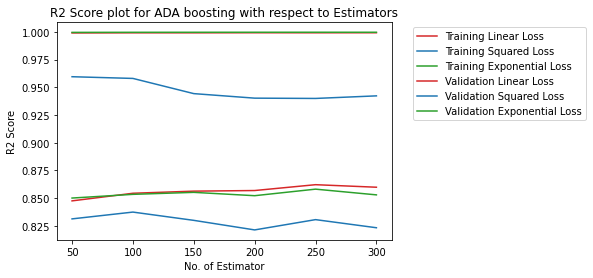

In [ ]:
est_l_t = []
est_s_t = []
est_e_t = []
err_l_t = []
err_s_t = []
err_e_t = []

est_l_v = []
est_s_v = []
est_e_v = []
err_l_v = []
err_s_v = []
err_e_v = []

for i in range(len(adadt['param_loss'])):
    if (adadt['param_loss'][i] == 'linear'):
        est_l_t.append(adadt['param_n_estimators'][i])
        err_l_t.append(adadt['mean_train_r2'][i])
        est_l_v.append(adadt['param_n_estimators'][i])
        err_l_v.append(adadt['mean_test_r2'][i])
    elif(adadt['param_loss'][i] == 'square'):
        est_s_t.append(adadt['param_n_estimators'][i])
        err_s_t.append(adadt['mean_train_r2'][i])
        est_s_v.append(adadt['param_n_estimators'][i])
        err_s_v.append(adadt['mean_test_r2'][i])
    else:
        est_e_t.append(adadt['param_n_estimators'][i])
        err_e_t.append(adadt['mean_train_r2'][i])
        est_e_v.append(adadt['param_n_estimators'][i])
        err_e_v.append(adadt['mean_test_r2'][i])

plt.plot(est_l_t, err_l_t,color = 'tab:red',label='Training Linear Loss')
plt.plot(est_s_t, err_s_t,color = 'tab:blue',label='Training Squared Loss')
plt.plot(est_e_t, err_e_t,color = 'tab:green',label='Training Exponential Loss')
plt.plot(est_l_v, err_l_v,color = 'tab:red',label='Validation Linear Loss')
plt.plot(est_s_v, err_s_v,color = 'tab:blue',label='Validation Squared Loss')
plt.plot(est_e_v, err_e_v,color = 'tab:green',label='Validation Exponential Loss')
plt.xlabel('No. of Estimator')
plt.ylabel('R2 Score')
plt.title('R2 Score plot for ADA boosting with respect to Estimators')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
scoring_para = ['neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','r2']
def perform_random_forest_regressor(x_train, y_train, x_test, y_test):
  params = {
      'criterion': ["absolute_error", "squared_error"],
      'max_depth': [i for i in range(1,30,1)]
  }
  gscv = GridSearchCV(RandomForestRegressor(), param_grid = params, scoring = scoring_para, refit = 'neg_root_mean_squared_error', return_train_score = True, n_jobs = -1, cv = 4)
  gscv.fit(x_train, y_train)
  result = pd.DataFrame(gscv.cv_results_)
#   result = result[['params','mean_train_score', 'mean_test_score']]
#   print("Cross Validation Results for Training and Validation Set:")
#   print(result.to_string())
  print("----------------------------------------------------")
  print("Best Parameter: ", gscv.best_params_)
  print("----------------------------------------------------")
  y_pred = gscv.predict(x_test)
  get_metrics(gscv.predict(x_train), y_train, "Training")
  get_metrics(y_pred, y_test,"Testing")
  
  return result,gscv.best_params_

rf_result,di = perform_random_forest_regressor(x_train, y_train, x_test, y_test)

----------------------------------------------------
Best Parameter:  {'criterion': 'absolute_error', 'max_depth': 20}
----------------------------------------------------
Performance Metrics on Training Data-Set: 

Absolute Error:  1463.4230431135718
Mean Square Error:  8805296.681120593
Root Mean Square Error:  2967.372015963046
R2 Score:  0.9784786004542674
----------------------------------------------------
Performance Metrics on Testing Data-Set: 

Absolute Error:  3502.0467035546612
Mean Square Error:  73204532.42929934
Root Mean Square Error:  8555.96472814722
R2 Score:  0.844900220496436
----------------------------------------------------


## Random Forest Performance Metrics

In [ ]:
rfresult = rf_result.drop(columns,axis=1)

In [ ]:
for i in rfresult.columns.tolist():
  if ('_neg_' in i): rfresult[i] = rfresult[i].apply(lambda x: x*-1)

In [ ]:
rfresult.head()

In [ ]:
pmd_ae_t = []
pmd_se_t = []
err_ae_t = []
err_se_t = []

pmd_ae_v = []
pmd_se_v = []
err_ae_v = []
err_se_v = []

for i in range(len(rfresult['param_max_depth'])):
    if (rfresult['param_criterion'][i] == 'absolute_error'):
        pmd_ae_t.append(rfresult['param_max_depth'][i])
        err_ae_t.append(rfresult['mean_train_neg_mean_absolute_error'][i])
        pmd_ae_v.append(rfresult['param_max_depth'][i])
        err_ae_v.append(rfresult['mean_test_neg_mean_absolute_error'][i])
    else:
        pmd_se_t.append(rfresult['param_max_depth'][i])
        err_se_t.append(rfresult['mean_train_neg_mean_absolute_error'][i])
        pmd_se_v.append(rfresult['param_max_depth'][i])
        err_se_v.append(rfresult['mean_test_neg_mean_absolute_error'][i])

plt.plot(pmd_ae_t, err_ae_t,color = 'tab:red',label='Training Absolute Error')
plt.plot(pmd_se_t, err_se_t,color = 'tab:blue',label='Training Squared Error')
plt.plot(pmd_ae_v, err_ae_v,color = 'tab:green',label='Validation Absolute Error')
plt.plot(pmd_se_v, err_se_v,color = 'tab:orange',label='Validation Squared Error')

plt.xlabel('Max Depth')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error plot for random forest with respect to maximum depth')
plt.legend()
plt.show()


In [ ]:
pmd_ae_t = []
pmd_se_t = []
err_ae_t = []
err_se_t = []

pmd_ae_v = []
pmd_se_v = []
err_ae_v = []
err_se_v = []

for i in range(len(rfresult['param_max_depth'])):
    if (rfresult['param_criterion'][i] == 'absolute_error'):
        pmd_ae_t.append(rfresult['param_max_depth'][i])
        err_ae_t.append(rfresult['mean_train_neg_mean_squared_error'][i])
        pmd_ae_v.append(rfresult['param_max_depth'][i])
        err_ae_v.append(rfresult['mean_test_neg_mean_squared_error'][i])
    else:
        pmd_se_t.append(rfresult['param_max_depth'][i])
        err_se_t.append(rfresult['mean_train_neg_mean_squared_error'][i])
        pmd_se_v.append(rfresult['param_max_depth'][i])
        err_se_v.append(rfresult['mean_test_neg_mean_squared_error'][i])

plt.plot(pmd_ae_t, err_ae_t,color = 'tab:red',label='Training Absolute Error')
plt.plot(pmd_se_t, err_se_t,color = 'tab:blue',label='Training Squared Error')
plt.plot(pmd_ae_v, err_ae_v,color = 'tab:green',label='Validation Absolute Error')
plt.plot(pmd_se_v, err_se_v,color = 'tab:orange',label='Validation Squared Error')

plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error plot for random forest with respect to maximum depth')
plt.legend()
plt.show()


In [ ]:
pmd_ae_t = []
pmd_se_t = []
err_ae_t = []
err_se_t = []

pmd_ae_v = []
pmd_se_v = []
err_ae_v = []
err_se_v = []

for i in range(len(rfresult['param_max_depth'])):
    if (rfresult['param_criterion'][i] == 'absolute_error'):
        pmd_ae_t.append(rfresult['param_max_depth'][i])
        err_ae_t.append(rfresult['mean_train_neg_root_mean_squared_error'][i])
        pmd_ae_v.append(rfresult['param_max_depth'][i])
        err_ae_v.append(rfresult['mean_test_neg_root_mean_squared_error'][i])
    else:
        pmd_se_t.append(rfresult['param_max_depth'][i])
        err_se_t.append(rfresult['mean_train_neg_root_mean_squared_error'][i])
        pmd_se_v.append(rfresult['param_max_depth'][i])
        err_se_v.append(rfresult['mean_test_neg_root_mean_squared_error'][i])

plt.plot(pmd_ae_t, err_ae_t,color = 'tab:red',label='Training Absolute Error')
plt.plot(pmd_se_t, err_se_t,color = 'tab:blue',label='Training Squared Error')
plt.plot(pmd_ae_v, err_ae_v,color = 'tab:green',label='Validation Absolute Error')
plt.plot(pmd_se_v, err_se_v,color = 'tab:orange',label='Validation Squared Error')

plt.xlabel('Max Depth')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error plot for random forest with respect to maximum depth')
plt.legend()
plt.show()


In [ ]:
pmd_ae_t = []
pmd_se_t = []
err_ae_t = []
err_se_t = []

pmd_ae_v = []
pmd_se_v = []
err_ae_v = []
err_se_v = []

for i in range(len(rfresult['param_max_depth'])):
    if (rfresult['param_criterion'][i] == 'absolute_error'):
        pmd_ae_t.append(rfresult['param_max_depth'][i])
        err_ae_t.append(rfresult['mean_train_r2'][i])
        pmd_ae_v.append(rfresult['param_max_depth'][i])
        err_ae_v.append(rfresult['mean_test_r2'][i])
    else:
        pmd_se_t.append(rfresult['param_max_depth'][i])
        err_se_t.append(rfresult['mean_train_r2'][i])
        pmd_se_v.append(rfresult['param_max_depth'][i])
        err_se_v.append(rfresult['mean_test_r2'][i])

plt.plot(pmd_ae_t, err_ae_t,color = 'tab:red',label='Training Absolute Error')
plt.plot(pmd_se_t, err_se_t,color = 'tab:blue',label='Training Squared Error')
plt.plot(pmd_ae_v, err_ae_v,color = 'tab:green',label='Validation Absolute Error')
plt.plot(pmd_se_v, err_se_v,color = 'tab:orange',label='Validation Squared Error')

plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('R2 Score plot for random forest with respect to maximum depth')
plt.legend()
plt.show()

#SVM 2

In [ ]:
pip install tune-sklearn scikit-optimize ray[tune]

In [ ]:
from tune_sklearn import TuneSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
columns = ['params','split0_test_neg_mean_absolute_error','split1_test_neg_mean_absolute_error','split2_test_neg_mean_absolute_error','split3_test_neg_mean_absolute_error','std_test_neg_mean_absolute_error','rank_test_neg_mean_absolute_error','split0_train_neg_mean_absolute_error','split1_train_neg_mean_absolute_error','split2_train_neg_mean_absolute_error','split3_train_neg_mean_absolute_error','std_train_neg_mean_absolute_error',
           'split0_test_neg_mean_squared_error','split1_test_neg_mean_squared_error','split2_test_neg_mean_squared_error','split3_test_neg_mean_squared_error','std_test_neg_mean_squared_error','rank_test_neg_mean_squared_error','split0_train_neg_mean_squared_error','split1_train_neg_mean_squared_error','split2_train_neg_mean_squared_error','split3_train_neg_mean_squared_error','std_train_neg_mean_squared_error','split0_test_neg_root_mean_squared_error','split1_test_neg_root_mean_squared_error',
           'split2_test_neg_root_mean_squared_error','split3_test_neg_root_mean_squared_error','std_test_neg_root_mean_squared_error','rank_test_neg_root_mean_squared_error','split0_train_neg_root_mean_squared_error','split1_train_neg_root_mean_squared_error','split2_train_neg_root_mean_squared_error','split3_train_neg_root_mean_squared_error','std_train_neg_root_mean_squared_error','split0_test_r2','split1_test_r2','split2_test_r2','split3_test_r2','std_test_r2','rank_test_r2','split0_train_r2',
           'split1_train_r2','split2_train_r2','split3_train_r2','std_train_r2', 'time_total_s', 'rank_train_r2', 'training_iteration', 'rank_train_neg_root_mean_squared_error', 'rank_train_neg_mean_squared_error', 'rank_train_neg_mean_absolute_error']

## Epsilon SVR

In [ ]:
def perform_svr(x_train, y_train, x_test, y_test):
  print("Performing Epsilon Support Vector Regression:\n")
  params = {
      'C': [0.01, 0.1, 1.0, 10.0], 
      'epsilon': [0.01, 0.1, 1.0, 10.0], 
      'kernel': ['linear', 'rbf', 'sigmoid'],
      'gamma': ['scale', 'auto']
  }
  gscv = TuneSearchCV(SVR(), param_distributions = params, scoring = scoring, refit = 'neg_root_mean_squared_error', return_train_score = True, use_gpu=True, n_jobs = -1, cv = 4)
  gscv.fit(x_train, y_train)
  result = pd.DataFrame(gscv.cv_results_)
  print("----------------------------------------------------")
  print("Best Parameter: ", gscv.best_params_)
  print("----------------------------------------------------")
  y_pred = gscv.predict(x_test)
  get_metrics(gscv.predict(x_train), y_train, "Training")
  get_metrics(y_pred, y_test, "Testing")
  return result

In [ ]:
lresult = perform_svr(x_train, y_train, x_test, y_test)

----------------------------------------------------
Best Parameter:  {'C': 10.0, 'epsilon': 0.01, 'kernel': 'linear', 'gamma': 'scale'}
----------------------------------------------------
Performance Metrics on Training Data-Set: 

Absolute Error:  6876.491564976699
Mean Square Error:  247435388.08015725
Root Mean Square Error:  15730.079086900907
R2 Score:  0.4236989904905052
----------------------------------------------------
Performance Metrics on Testing Data-Set: 

Absolute Error:  6907.06532378226
Mean Square Error:  208202703.26454553
Root Mean Square Error:  14429.230861849343
R2 Score:  0.4682809207400075
----------------------------------------------------


In [ ]:
lresult.head()

,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_neg_mean_absolute_error,split1_train_neg_mean_absolute_error,split2_train_neg_mean_absolute_error,split3_train_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error,rank_train_neg_mean_absolute_error,split0_train_neg_mean_squared_error,split1_train_neg_mean_squared_error,split2_train_neg_mean_squared_error,split3_train_neg_mean_squared_error,mean_train_neg_mean_squared_error,std_train_neg_mean_squared_error,rank_train_neg_mean_squared_error,split0_train_neg_root_mean_squared_error,split1_train_neg_root_mean_squared_error,split2_train_neg_root_mean_squared_error,split3_train_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error,rank_train_neg_root_mean_squared_error,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,mean_train_r2,std_train_r2,rank_train_r2,time_total_s,training_iteration,param_C,param_epsilon,param_kernel,param_gamma
0,"{'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf', '...",-12082.715623,-12267.808029,-11862.394820,-11727.103752,-11985.005556,206.803789,6,-5.085429e+08,-5.332231e+08,-3.658500e+08,-3.623950e+08,-4.425027e+08,7.887392e+07,6,-22550.895091,-23091.623459,-19127.204928,-19036.674662,-20951.599535,1879.680932,6,-0.032067,-0.033104,-0.035231,-0.023573,-0.030994,0.004434,6,-11952.212186,-11890.344311,-12025.308409,-12070.136105,-11984.500253,68.750755,6,-4.213828e+08,-4.113249e+08,-4.678540e+08,-4.696727e+08,-4.425586e+08,2.645276e+07,6,-20527.610220,-20281.145324,-21629.932269,-21671.934482,-21027.655574,629.514781,6,-0.032352,-0.027621,-0.029020,-0.034116,-0.030777,0.002582,6,20.972842,1,0.1,0.01,rbf,auto
1,"{'C': 0.01, 'epsilon': 0.01, 'kernel': 'linear...",-12019.468586,-12206.853049,-11799.088219,-11663.389421,-11922.199819,207.742607,3,-5.055059e+08,-5.303927e+08,-3.631120e+08,-3.593266e+08,-4.395843e+08,7.886876e+07,3,-22483.458404,-23030.255402,-19055.498663,-18955.911816,-20881.281071,1885.841394,3,-0.025903,-0.027620,-0.027484,-0.014907,-0.023979,0.005281,3,-11890.149449,-11825.368179,-11962.855738,-12008.182047,-11921.638853,69.728368,3,-4.184435e+08,-4.084951e+08,-4.650785e+08,-4.664303e+08,-4.396119e+08,2.638245e+07,3,-20455.892754,-20211.260961,-21565.679386,-21596.998450,-20957.457888,629.945029,3,-0.025151,-0.020552,-0.022915,-0.026977,-0.023899,0.002409,3,14.125883,1,0.01,0.01,linear,auto
2,"{'C': 0.1, 'epsilon': 1.0, 'kernel': 'rbf', 'g...",-12082.696982,-12267.808029,-11862.394820,-11727.103752,-11985.000896,206.801588,5,-5.085359e+08,-5.332231e+08,-3.658500e+08,-3.623950e+08,-4.425010e+08,7.887246e+07,5,-22550.740686,-23091.623459,-19127.204928,-19036.674662,-20951.560934,1879.648090,5,-0.032053,-0.033104,-0.035231,-0.023573,-0.030990,0.004433,5,-11952.205227,-11890.344311,-12025.308409,-12070.136105,-11984.498513,68.751573,5,-4.213764e+08,-4.113249e+08,-4.678540e+08,-4.696727e+08,-4.425570e+08,2.645404e+07,5,-20527.455318,-20281.145324,-21629.932269,-21671.934482,-21027.616848,629.545545,5,-0.032336,-0.027621,-0.029020,-0.034116,-0.030773,0.002580,5,16.413539,1,0.1,1.0,rbf,auto
3,"{'C': 0.01, 'epsilon': 0.01, 'kernel': 'linear.

In [ ]:
epsvr = lresult.drop(columns,axis=1)

In [ ]:
for i in epsvr.columns.tolist():
  if ('_neg_' in i): epsvr[i] = epsvr[i].apply(lambda x: x*-1)

In [ ]:
epsvr.head()

,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_neg_root_mean_squared_error,mean_test_r2,mean_train_neg_mean_absolute_error,mean_train_neg_mean_squared_error,mean_train_neg_root_mean_squared_error,mean_train_r2,param_C,param_epsilon,param_kernel,param_gamma
0,11985.005556,4.425027e+08,20951.599535,-0.030994,11984.500253,4.425586e+08,21027.655574,-0.030777,0.1,0.01,rbf,auto
1,11922.199819,4.395843e+08,20881.281071,-0.023979,11921.638853,4.396119e+08,20957.457888,-0.023899,0.01,0.01,linear,auto
2,11985.000896,4.425010e+08,20951.560934,-0.030990,11984.498513,4.425570e+08,21027.616848,-0.030773,0.1,1.0,rbf,auto
3,11922.199819,4.395843e+08,20881.281071,-0.023979,11921.638853,4.396119e+08,20957.457888,-0.023899,0.01,0.01,linear,auto
4,11997.695780,4.429934e+08,20963.398258,-0.032174,11997.241340,4.430477e+08,21039.269797,-0.031916,0.01,0.01,rbf,auto


In [ ]:
# plot graphs

## Linear SVR

In [ ]:
def perform_linear_svr(x_train, y_train, x_test, y_test):
  print("Performing Linear Support Vector Regression:\n")
  params = {
      'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
      'C':[0.001, 0.01, 0.1, 1.0, 10.0]
  }
  gscv = TuneSearchCV(LinearSVR(), param_distributions = params, scoring = scoring, refit = 'neg_root_mean_squared_error', return_train_score = True, use_gpu=True, n_jobs = -1, cv = 4)
  gscv.fit(x_train, y_train)
  result = pd.DataFrame(gscv.cv_results_)
  print("----------------------------------------------------")
  print("Best Parameter: ", gscv.best_params_)
  print("----------------------------------------------------")
  y_pred = gscv.predict(x_test)
  get_metrics(gscv.predict(x_train), y_train, "Training")
  get_metrics(y_pred, y_test, "Testing")
  return result

In [ ]:
rresult = perform_linear_svr(x_train, y_train, x_test, y_test)

(<ray.tune.trainable.util._Trainable object at 0x7f3c29eaacd0> pid=1158) /usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(<ray.tune.trainable.util._Trainable object at 0x7f3c29eaacd0> pid=1158)   warnings.warn(
(<ray.tune.trainable.util._Trainable object at 0x7f3c29eaacd0> pid=1158) /usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(<ray.tune.trainable.util._Trainable object at 0x7f3c29eaacd0> pid=1158)   warnings.warn(
(<ray.tune.trainable.util._Trainable object at 0x7f3c29eaacd0> pid=1158) /usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(<ray.tune.trainable.util._Trainable object at 0x7f3c29eaacd0> pid=1158)   warnings.warn(
(<ray.tune.trainable.util._Trainable object at 0x7f3c29eaa

----------------------------------------------------
Best Parameter:  {'loss': 'epsilon_insensitive', 'C': 10.0}
----------------------------------------------------
Performance Metrics on Training Data-Set: 

Absolute Error:  8434.996525183546
Mean Square Error:  283109849.69394535
Root Mean Square Error:  16825.86846774767
R2 Score:  0.3406097104919885
----------------------------------------------------
Performance Metrics on Testing Data-Set: 

Absolute Error:  8534.573111388774
Mean Square Error:  245922834.59827965
Root Mean Square Error:  15681.92700525926
R2 Score:  0.37194925362973474
----------------------------------------------------


In [ ]:
rresult.head()

,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_neg_mean_absolute_error,split1_train_neg_mean_absolute_error,split2_train_neg_mean_absolute_error,split3_train_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error,rank_train_neg_mean_absolute_error,split0_train_neg_mean_squared_error,split1_train_neg_mean_squared_error,split2_train_neg_mean_squared_error,split3_train_neg_mean_squared_error,mean_train_neg_mean_squared_error,std_train_neg_mean_squared_error,rank_train_neg_mean_squared_error,split0_train_neg_root_mean_squared_error,split1_train_neg_root_mean_squared_error,split2_train_neg_root_mean_squared_error,split3_train_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error,rank_train_neg_root_mean_squared_error,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,mean_train_r2,std_train_r2,rank_train_r2,time_total_s,training_iteration,param_loss,param_C
0,"{'loss': 'epsilon_insensitive', 'C': 10.0}",-8093.012353,-9267.432123,-8770.413040,-8839.286112,-8742.535907,420.575386,1,-3.335120e+08,-3.807623e+08,-2.263083e+08,-2.051040e+08,-2.864217e+08,7.304764e+07,1,-18262.311889,-19513.131593,-15043.547329,-14321.453753,-16785.111141,2163.727679,1,0.323151,0.262284,0.359624,0.420690,0.341437,0.057470,1,-8050.444971,-8815.944606,-8731.028494,-9005.922890,-8650.835240,360.641018,1,-2.529686e+08,-2.738865e+08,-3.166572e+08,-2.846986e+08,-2.820527e+08,2.300568e+07,1,-15904.987063,-16549.515667,-17794.865404,-16873.013673,-16780.595451,681.427285,1,0.380249,0.315744,0.303529,0.373156,0.343170,0.033903,1,2.040687,1,epsilon_insensitive,10.0
1,"{'loss': 'epsilon_insensitive', 'C': 0.001}",-12081.308889,-12263.848274,-11858.045631,-11721.809697,-11981.253123,207.582606,9,-5.089716e+08,-5.348176e+08,-3.664968e+08,-3.624410e+08,-4.431818e+08,7.925447e+07,9,-22560.399578,-23126.123496,-19144.105673,-19037.884435,-20967.128295,1887.138509,9,-0.032937,-0.036193,-0.037062,-0.023703,-0.032474,0.005292,9,-11949.011424,-11886.339943,-12021.568996,-12067.006876,-11980.981810,68.968870,9,-4.217547e+08,-4.124837e+08,-4.685374e+08,-4.699472e+08,-4.431808e+08,2.627159e+07,9,-20536.668003,-20309.695898,-21645.725231,-21678.266667,-21042.588950,624.689476,9,-0.033263,-0.030517,-0.030523,-0.034721,-0.032256,0.001811,9,0.094491,1,epsilon_insensitive,0.001
2,"{'loss': 'squared_epsilon_insensitive', 'C': 0...",-66752.788067,-8528.172763,-18025.337604,-9961.896158,-25817.048648,23909.917464,10,-4.614180e+09,-3.330166e+08,-4.389487e+08,-2.408019e+08,-1.406737e+09,1.853145e+09,10,-67927.758863,-18248.742680,-20951.103746,-15517.791804,-30661.349273,21601.355786,10,-8.364289,0.354790,-0.242076,0.319863,-1.982928,3.691887,10,-66641.947945,-8192.350253,-18146.555410,-10507.736993,-25872.147650,23824.891093,10,-4.567741e+09,-2.352991e+08,-5.118141e+08,-3.360235e+08,-1.412719e+09,1.824238e+09,10,-67585.061758,-15339.463657,-22623.307930,-18330.944354,-30969.694425,21297.825063,10,-10.190572,0.412147,-0.125708,0.260150,-2.410996,4.495818,10,2.116459,1,squared_epsilon_insensitive,0.01
3,"{'loss': 'epsilon_insensitive', 'C': 0.01}",-12028.400093,-12216.083207,-

In [ ]:
linsvr = rresult.drop(columns,axis=1)

In [ ]:
for i in linsvr.columns.tolist():
  if ('_neg_' in i): linsvr[i] = linsvr[i].apply(lambda x: x*-1)

In [ ]:
linsvr.head()

,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_neg_root_mean_squared_error,mean_test_r2,mean_train_neg_mean_absolute_error,mean_train_neg_mean_squared_error,mean_train_neg_root_mean_squared_error,mean_train_r2,param_loss,param_C
0,8742.535907,2.864217e+08,16785.111141,0.341437,8650.835240,2.820527e+08,16780.595451,0.343170,epsilon_insensitive,10.0
1,11981.253123,4.431818e+08,20967.128295,-0.032474,11980.981810,4.431808e+08,21042.588950,-0.032256,epsilon_insensitive,0.001
2,25817.048648,1.406737e+09,30661.349273,-1.982928,25872.147650,1.412719e+09,30969.694425,-2.410996,squared_epsilon_insensitive,0.01
3,11932.690867,4.384687e+08,20853.609113,-0.021161,11933.127054,4.384367e+08,20929.735277,-0.021225,epsilon_insensitive,0.01
4,11932.547921,4.397631e+08,20883.082098,-0.023921,11932.130886,4.396194e+08,20958.478683,-0.024082,epsilon_insensitive,0.01


In [ ]:
# plot graphs

#KNN_Regressor


In [ ]:
def perform_KNN_Regresor(x_train, y_train, x_test, y_test):
  params = {
      'weights': ["uniform","distance"],
      'n_neighbors': [i for i in range(2,25,1)]
  }
  gscv = GridSearchCV(KNeighborsRegressor(), param_grid = params, scoring = scoring_para, refit = 'neg_root_mean_squared_error', return_train_score = True, n_jobs = -1, cv = 4)
  gscv.fit(x_train, y_train)
  result = pd.DataFrame(gscv.cv_results_)
  print("----------------------------------------------------")
  print("Best Parameter: ", gscv.best_params_)
  print("----------------------------------------------------")
  y_pred = gscv.predict(x_test)
  get_metrics(gscv.predict(x_train), y_train, "Training")
  get_metrics(y_pred, y_test, "Testing")
  return result

KNN_result = perform_KNN_Regresor(x_train, y_train, x_test, y_test)
KNN_result = KNN_result.drop(columns,axis=1)
for i in KNN_result.columns.tolist()[2:-2]:
  KNN_result[i] = KNN_result[i].apply(lambda x: x*-1)

----------------------------------------------------
Best Parameter:  {'n_neighbors': 3, 'weights': 'distance'}
----------------------------------------------------
Performance Metrics on Training Data-Set: 

Absolute Error:  0.2340390108072947
Mean Square Error:  88.15844847366229
Root Mean Square Error:  9.389273053525619
R2 Score:  0.9999997912344638
----------------------------------------------------
Performance Metrics on Testing Data-Set: 

Absolute Error:  4596.434187863932
Mean Square Error:  150356926.88898316
Root Mean Square Error:  12262.011535183905
R2 Score:  0.6418493901693927
----------------------------------------------------


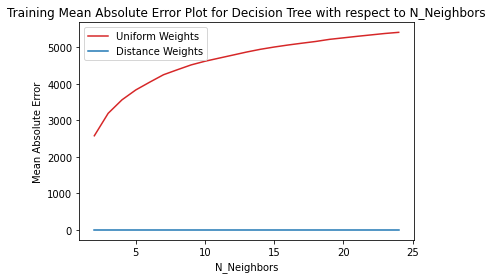

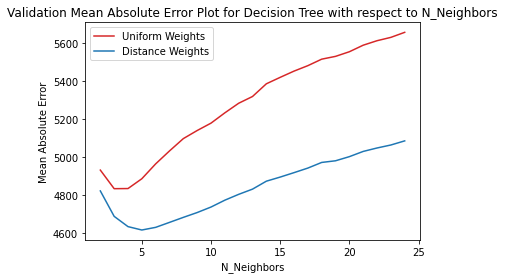

In [ ]:
pnn_u_t = []
pnn_d_t = []
err_u_t = []
err_d_t = []

pnn_u_v = []
pnn_d_v = []
err_u_v = []
err_d_v = []

for i in range(len(KNN_result['param_n_neighbors'])):
    if (KNN_result['param_weights'][i] == 'uniform'):
        pnn_u_t.append(KNN_result['param_n_neighbors'][i])
        err_u_t.append(KNN_result['mean_train_neg_mean_absolute_error'][i])
        pnn_u_v.append(KNN_result['param_n_neighbors'][i])
        err_u_v.append(KNN_result['mean_test_neg_mean_absolute_error'][i])
    else:
        pnn_d_t.append(KNN_result['param_n_neighbors'][i])
        err_d_t.append(KNN_result['mean_train_neg_mean_absolute_error'][i])
        pnn_d_v.append(KNN_result['param_n_neighbors'][i])
        err_d_v.append(KNN_result['mean_test_neg_mean_absolute_error'][i])

plt.plot(pnn_u_t, err_u_t,color = 'tab:red',label='Training Uniform Weights')
plt.plot(pnn_d_t, err_d_t,color = 'tab:blue',label='Training Distance Weights')
plt.plot(pnn_u_v, err_u_v,color = 'tab:green',label='Validation Uniform Weights')
plt.plot(pnn_d_v, err_d_v,color = 'tab:orange',label='Validation Distance Weights')
plt.xlabel('N_Neighbors')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error Plot for KNN with respect to N_Neighbors')
plt.legend()
plt.show()


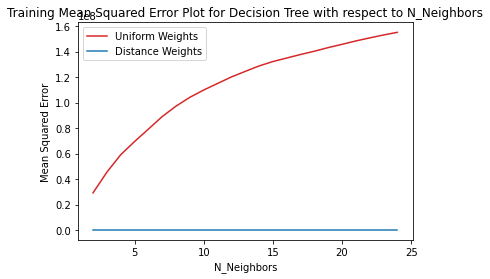

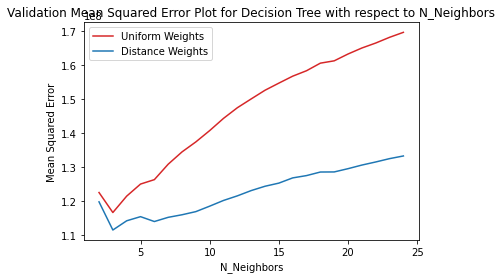

In [ ]:
pnn_u_t = []
pnn_d_t = []
err_u_t = []
err_d_t = []

pnn_u_v = []
pnn_d_v = []
err_u_v = []
err_d_v = []

for i in range(len(KNN_result['param_n_neighbors'])):
    if (KNN_result['param_weights'][i] == 'uniform'):
        pnn_u_t.append(KNN_result['param_n_neighbors'][i])
        err_u_t.append(KNN_result['mean_train_neg_mean_squared_error'][i])
        pnn_u_v.append(KNN_result['param_n_neighbors'][i])
        err_u_v.append(KNN_result['mean_test_neg_mean_squared_error'][i])
    else:
        pnn_d_t.append(KNN_result['param_n_neighbors'][i])
        err_d_t.append(KNN_result['mean_train_neg_mean_squared_error'][i])
        pnn_d_v.append(KNN_result['param_n_neighbors'][i])
        err_d_v.append(KNN_result['mean_test_neg_mean_squared_error'][i])

plt.plot(pnn_u_t, err_u_t,color = 'tab:red',label='Training Uniform Weights')
plt.plot(pnn_d_t, err_d_t,color = 'tab:blue',label='Training Distance Weights')
plt.plot(pnn_u_v, err_u_v,color = 'tab:green',label='Validation Uniform Weights')
plt.plot(pnn_d_v, err_d_v,color = 'tab:orange',label='Validation Distance Weights')
plt.xlabel('N_Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error Plot for KNN with respect to N_Neighbors')
plt.legend()
plt.show()


In [ ]:
pnn_u_t = []
pnn_d_t = []
err_u_t = []
err_d_t = []

pnn_u_v = []
pnn_d_v = []
err_u_v = []
err_d_v = []

for i in range(len(KNN_result['param_n_neighbors'])):
    if (KNN_result['param_weights'][i] == 'uniform'):
        pnn_u_t.append(KNN_result['param_n_neighbors'][i])
        err_u_t.append(KNN_result['mean_train_neg_root_mean_squared_error'][i])
        pnn_u_v.append(KNN_result['param_n_neighbors'][i])
        err_u_v.append(KNN_result['mean_test_neg_root_mean_squared_error'][i])
    else:
        pnn_d_t.append(KNN_result['param_n_neighbors'][i])
        err_d_t.append(KNN_result['mean_train_neg_root_mean_squared_error'][i])
        pnn_d_v.append(KNN_result['param_n_neighbors'][i])
        err_d_v.append(KNN_result['mean_test_neg_root_mean_squared_error'][i])

plt.plot(pnn_u_t, err_u_t,color = 'tab:red',label='Training Uniform Weights')
plt.plot(pnn_d_t, err_d_t,color = 'tab:blue',label='Training Distance Weights')
plt.plot(pnn_u_v, err_u_v,color = 'tab:green',label='Validation Uniform Weights')
plt.plot(pnn_d_v, err_d_v,color = 'tab:orange',label='Validation Distance Weights')
plt.xlabel('N_Neighbors')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error Plot for KNN with respect to N_Neighbors')
plt.legend()
plt.show()


In [ ]:
pnn_u_t = []
pnn_d_t = []
err_u_t = []
err_d_t = []

pnn_u_v = []
pnn_d_v = []
err_u_v = []
err_d_v = []

for i in range(len(KNN_result['param_n_neighbors'])):
    if (KNN_result['param_weights'][i] == 'uniform'):
        pnn_u_t.append(KNN_result['param_n_neighbors'][i])
        err_u_t.append(KNN_result['mean_train_r2'][i])
        pnn_u_v.append(KNN_result['param_n_neighbors'][i])
        err_u_v.append(KNN_result['mean_test_r2'][i])
    else:
        pnn_d_t.append(KNN_result['param_n_neighbors'][i])
        err_d_t.append(KNN_result['mean_train_r2'][i])
        pnn_d_v.append(KNN_result['param_n_neighbors'][i])
        err_d_v.append(KNN_result['mean_test_r2'][i])

plt.plot(pnn_u_t, err_u_t,color = 'tab:red',label='Training Uniform Weights')
plt.plot(pnn_d_t, err_d_t,color = 'tab:blue',label='Training Distance Weights')
plt.plot(pnn_u_v, err_u_v,color = 'tab:green',label='Validation Uniform Weights')
plt.plot(pnn_d_v, err_d_v,color = 'tab:orange',label='Validation Distance Weights')
plt.xlabel('N_Neighbors')
plt.ylabel('R2 Score')
plt.title('R2 Score Plot for KNN with respect to N_Neighbors')
plt.legend()
plt.show()
